In [1]:
from statsmodels.regression.rolling import RollingOLS
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import pandas_ta
import pandas_datareader.data as web
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')


In [2]:
sp500=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
symbols=sp500[0]['Symbol'].str.replace('.','-').unique().tolist()
symbols

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BK',
 'BBWI',
 'BAX',
 'BDX',
 'BRK-B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF-B',
 'BLDR',
 'BG',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'COR',
 'CNC',
 'CNP',
 'CDAY',
 'CF',
 'CHRW',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA

In [3]:
end_date='2023-10-26'
start_date=pd.to_datetime(end_date)-pd.DateOffset(365*8)
start_date

Timestamp('2015-10-28 00:00:00')

In [4]:
df=yf.download(tickers=symbols,start=start_date,end=end_date,interval='1d')

[*********************100%%**********************]  503 of 503 completed


In [5]:
df_c=df

In [6]:
df1=df.stack()

In [7]:
df1.index.names=['date','ticker']

In [8]:
df1

Adj Close       Close        High         Low        Open  \
date       ticker                                                               
2015-10-28 A        35.067650   37.520000   37.610001   36.770000   37.060001   
           AAL      43.731598   45.860001   46.360001   45.230000   46.200001   
           AAPL     27.029940   29.817499   29.825001   29.014999   29.232500   
           ABBV     37.699020   53.259998   53.840000   52.080002   52.820000   
           ABT      38.531666   44.759998   44.770000   43.639999   43.959999   
...                       ...         ...         ...         ...         ...   
2023-10-25 YUM     119.743599  120.309998  121.260002  119.510002  119.779999   
           ZBH     103.433678  103.639999  104.750000  103.220001  104.699997   
           ZBRA    198.910004  198.910004  205.229996  196.130005  203.830002   
           ZION     29.273745   29.629999   29.969999   28.900000   29.510000   
           ZTS     163.279068  163.669998  165.990005  162.350006  165.559998   

                        Volume  
date       ticker               
2015-10-28 A         1780100.0  
           AAL       7629700.0  
           AAPL    342205600.0  
           ABBV      7869000.0  
           ABT       6158300.0  
...                        ...  
2023-10-25 YUM        985800.0  
           ZBH       1698500.0  
           ZBRA       577900.0  
           ZION      2713300.0  
           ZTS       1273600.0  

[993608 rows x 6 columns]

In [9]:
def Garman_Klass_Volatility(Df):
    df=Df.copy()
    df['Gk_Vol']=(np.log(df['High'])-np.log(df['Low']))**2/2-(2*np.log(2)-1)*(np.log(df['Adj Close'])-np.log(df['Open']))**2
    return df['Gk_Vol']
df1['garman_klass_vol']=Garman_Klass_Volatility(df1)
df1

Adj Close       Close        High         Low        Open  \
date       ticker                                                               
2015-10-28 A        35.067650   37.520000   37.610001   36.770000   37.060001   
           AAL      43.731598   45.860001   46.360001   45.230000   46.200001   
           AAPL     27.029940   29.817499   29.825001   29.014999   29.232500   
           ABBV     37.699020   53.259998   53.840000   52.080002   52.820000   
           ABT      38.531666   44.759998   44.770000   43.639999   43.959999   
...                       ...         ...         ...         ...         ...   
2023-10-25 YUM     119.743599  120.309998  121.260002  119.510002  119.779999   
           ZBH     103.433678  103.639999  104.750000  103.220001  104.699997   
           ZBRA    198.910004  198.910004  205.229996  196.130005  203.830002   
           ZION     29.273745   29.629999   29.969999   28.900000   29.510000   
           ZTS     163.279068  163.669998  165.990005  162.350006  165.559998   

                        Volume  garman_klass_vol  
date       ticker                                 
2015-10-28 A         1780100.0         -0.000924  
           AAL       7629700.0         -0.000860  
           AAPL    342205600.0         -0.001991  
           ABBV      7869000.0         -0.043385  
           ABT       6158300.0         -0.006384  
...                        ...               ...  
2023-10-25 YUM        985800.0          0.000106  
           ZBH       1698500.0          0.000051  
           ZBRA       577900.0          0.000798  
           ZION      2713300.0          0.000636  
           ZTS       1273600.0          0.000171  

[993608 rows x 7 columns]

In [10]:
'''def RSI(Df,n=14):
    df=Df.copy()
    df['change']=df['Adj Close']-df['Adj Close'].shift(1)
    df['gain']=np.where(df['change']>=0,df['change'],0)
    df['loss']=np.where(df['change']<0,-df['change'],0)
    df['avg_gain']=df['gain'].ewm(alpha=1/n,min_periods=n).mean()
    df['avg_loss']=df['loss'].ewm(alpha=1/n,min_periods=n).mean()
    df['rs']=df['avg_gain']/df['avg_loss']
    df['rsi']=100-100/(1+df['rs'])
    return df['rsi']'''
#df1['rsi1']=RSI(df1)
df1['rsi2']=df1.groupby(level=1)['Adj Close'].transform(lambda x: pandas_ta.rsi(close=x,length=14))


<Axes: xlabel='rsi2', ylabel='Density'>

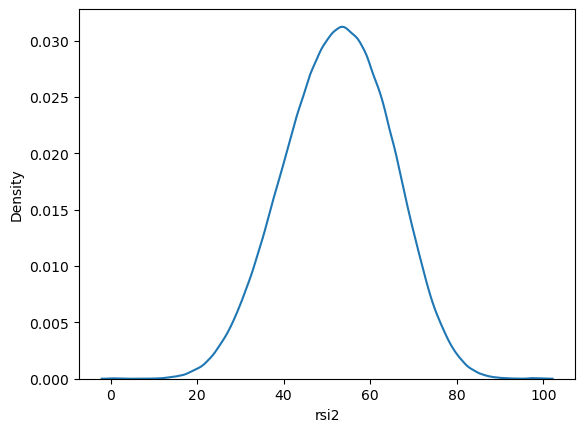

In [11]:
import seaborn as sns
sns.kdeplot(x='rsi2',data=df1)


In [12]:
df1

Adj Close       Close        High         Low        Open  \
date       ticker                                                               
2015-10-28 A        35.067650   37.520000   37.610001   36.770000   37.060001   
           AAL      43.731598   45.860001   46.360001   45.230000   46.200001   
           AAPL     27.029940   29.817499   29.825001   29.014999   29.232500   
           ABBV     37.699020   53.259998   53.840000   52.080002   52.820000   
           ABT      38.531666   44.759998   44.770000   43.639999   43.959999   
...                       ...         ...         ...         ...         ...   
2023-10-25 YUM     119.743599  120.309998  121.260002  119.510002  119.779999   
           ZBH     103.433678  103.639999  104.750000  103.220001  104.699997   
           ZBRA    198.910004  198.910004  205.229996  196.130005  203.830002   
           ZION     29.273745   29.629999   29.969999   28.900000   29.510000   
           ZTS     163.279068  163.669998  165.990005  162.350006  165.559998   

                        Volume  garman_klass_vol       rsi2  
date       ticker                                            
2015-10-28 A         1780100.0         -0.000924        NaN  
           AAL       7629700.0         -0.000860        NaN  
           AAPL    342205600.0         -0.001991        NaN  
           ABBV      7869000.0         -0.043385        NaN  
           ABT       6158300.0         -0.006384        NaN  
...                        ...               ...        ...  
2023-10-25 YUM        985800.0          0.000106  44.961224  
           ZBH       1698500.0          0.000051  32.508310  
           ZBRA       577900.0          0.000798  25.570518  
           ZION      2713300.0          0.000636  32.666461  
           ZTS       1273600.0          0.000171  27.415342  

[993608 rows x 8 columns]

<Axes: xlabel='date'>

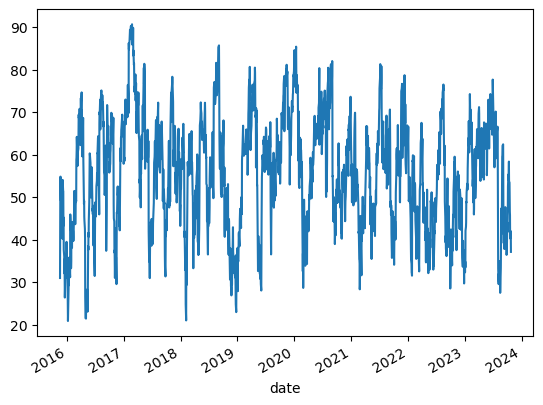

In [13]:
df1.xs('AAPL',level=1)['rsi2'].plot()

In [14]:
def bol_bands(Df,n=14):
    df=Df.copy()
    df['MB']=np.log1p(df['Adj Close']).rolling(n).mean()
    df['UB']=df['MB']+2*np.log1p(df['Adj Close']).rolling(n).std(ddof=0) #Calculating std of population so degree of freedom is 0
    df['LB']=df['MB']-2*np.log1p(df['Adj Close']).rolling(n).std(ddof=0)
    df['Bolband_width']=df['MB']-df['LB'] #All 4 columns are important so we return all of them
    return (df[['MB','UB','LB','Bolband_width']])
df1[['MB','UB','LB','Bolband_width']]=bol_bands(df1)


In [15]:
df1

Adj Close       Close        High         Low        Open  \
date       ticker                                                               
2015-10-28 A        35.067650   37.520000   37.610001   36.770000   37.060001   
           AAL      43.731598   45.860001   46.360001   45.230000   46.200001   
           AAPL     27.029940   29.817499   29.825001   29.014999   29.232500   
           ABBV     37.699020   53.259998   53.840000   52.080002   52.820000   
           ABT      38.531666   44.759998   44.770000   43.639999   43.959999   
...                       ...         ...         ...         ...         ...   
2023-10-25 YUM     119.743599  120.309998  121.260002  119.510002  119.779999   
           ZBH     103.433678  103.639999  104.750000  103.220001  104.699997   
           ZBRA    198.910004  198.910004  205.229996  196.130005  203.830002   
           ZION     29.273745   29.629999   29.969999   28.900000   29.510000   
           ZTS     163.279068  163.669998  165.990005  162.350006  165.559998   

                        Volume  garman_klass_vol       rsi2        MB  \
date       ticker                                                       
2015-10-28 A         1780100.0         -0.000924        NaN       NaN   
           AAL       7629700.0         -0.000860        NaN       NaN   
           AAPL    342205600.0         -0.001991        NaN       NaN   
           ABBV      7869000.0         -0.043385        NaN       NaN   
           ABT       6158300.0         -0.006384        NaN       NaN   
...                        ...               ...        ...       ...   
2023-10-25 YUM        985800.0          0.000106  44.961224  4.441026   
           ZBH       1698500.0          0.000051  32.508310  4.408618   
           ZBRA       577900.0          0.000798  25.570518  4.533024   
           ZION      2713300.0          0.000636  32.666461  4.412707   
           ZTS       1273600.0          0.000171  27.415342  4.476254   

                         UB        LB  Bolband_width  
date       ticker                                     
2015-10-28 A            NaN       NaN            NaN  
           AAL          NaN       NaN            NaN  
           AAPL         NaN       NaN            NaN  
           ABBV         NaN       NaN            NaN  
           ABT          NaN       NaN            NaN  
...                     ...       ...            ...  
2023-10-25 YUM     5.923359  2.958693       1.482333  
           ZBH     5.851009  2.966227       1.442391  
           ZBRA    5.960225  3.105822       1.427202  
           ZION    5.912379  2.913035       1.499672  
           ZTS     6.011481  2.941027       1.535227  

[993608 rows x 12 columns]

In [16]:
def ATR(Df,n=14):
    df=Df.copy()
    df['h_l']=df['High']-df['Low']
    df['h_pc']=df['High']-df['Adj Close'].shift(1)
    df['l_pc']=df['Low']-df['Adj Close'].shift(1)
    df['TR']=df[['h_l','h_pc','l_pc']].max(axis=1,skipna=False)
    df['ATR']=df['TR'].ewm(span=n,min_periods=n).mean()
    df['ATR']=(df['ATR']-df['ATR'].mean())/df['ATR'].std()
    return df['ATR']
df1['atr']=ATR(df1)

In [17]:
df1

Adj Close       Close        High         Low        Open  \
date       ticker                                                               
2015-10-28 A        35.067650   37.520000   37.610001   36.770000   37.060001   
           AAL      43.731598   45.860001   46.360001   45.230000   46.200001   
           AAPL     27.029940   29.817499   29.825001   29.014999   29.232500   
           ABBV     37.699020   53.259998   53.840000   52.080002   52.820000   
           ABT      38.531666   44.759998   44.770000   43.639999   43.959999   
...                       ...         ...         ...         ...         ...   
2023-10-25 YUM     119.743599  120.309998  121.260002  119.510002  119.779999   
           ZBH     103.433678  103.639999  104.750000  103.220001  104.699997   
           ZBRA    198.910004  198.910004  205.229996  196.130005  203.830002   
           ZION     29.273745   29.629999   29.969999   28.900000   29.510000   
           ZTS     163.279068  163.669998  165.990005  162.350006  165.559998   

                        Volume  garman_klass_vol       rsi2        MB  \
date       ticker                                                       
2015-10-28 A         1780100.0         -0.000924        NaN       NaN   
           AAL       7629700.0         -0.000860        NaN       NaN   
           AAPL    342205600.0         -0.001991        NaN       NaN   
           ABBV      7869000.0         -0.043385        NaN       NaN   
           ABT       6158300.0         -0.006384        NaN       NaN   
...                        ...               ...        ...       ...   
2023-10-25 YUM        985800.0          0.000106  44.961224  4.441026   
           ZBH       1698500.0          0.000051  32.508310  4.408618   
           ZBRA       577900.0          0.000798  25.570518  4.533024   
           ZION      2713300.0          0.000636  32.666461  4.412707   
           ZTS       1273600.0          0.000171  27.415342  4.476254   

                         UB        LB  Bolband_width       atr  
date       ticker                                               
2015-10-28 A            NaN       NaN            NaN       NaN  
           AAL          NaN       NaN            NaN       NaN  
           AAPL         NaN       NaN            NaN       NaN  
           ABBV         NaN       NaN            NaN       NaN  
           ABT          NaN       NaN            NaN       NaN  
...                     ...       ...            ...       ...  
2023-10-25 YUM     5.923359  2.958693       1.482333 -0.370588  
           ZBH     5.851009  2.966227       1.442391 -0.464963  
           ZBRA    5.960225  3.105822       1.427202 -0.325622  
           ZION    5.912379  2.913035       1.499672 -0.427007  
           ZTS     6.011481  2.941027       1.535227 -0.215711  

[993608 rows x 13 columns]

In [18]:

def MACD(df,a=12,b=26,c=9):
    df1=df.copy()
    ema_26=df1['Adj Close'].ewm(span=b,min_periods=b).mean()
    ema_12=df1['Adj Close'].ewm(span=a,min_periods=a).mean()
    df1['macd']=ema_12-ema_26
    df1['signal_macd']=df1['macd'].ewm(span=c,min_periods=c).mean()
    df1['signal_macd']=(df1['signal_macd']-df1['signal_macd'].mean())/df1['signal_macd'].std()
    return df1['signal_macd']
df1['macd']=MACD(df1)

In [19]:
df1['macd'].describe()

count    9.935750e+05
mean    -4.006558e-18
std      1.000000e+00
min     -4.536794e+00
25%     -3.763858e-01
50%     -3.099967e-02
75%      2.986656e-01
max      1.004764e+01
Name: macd, dtype: float64

In [20]:
df1['macd'].mean()

-4.006557811031841e-18

<Axes: xlabel='macd', ylabel='Density'>

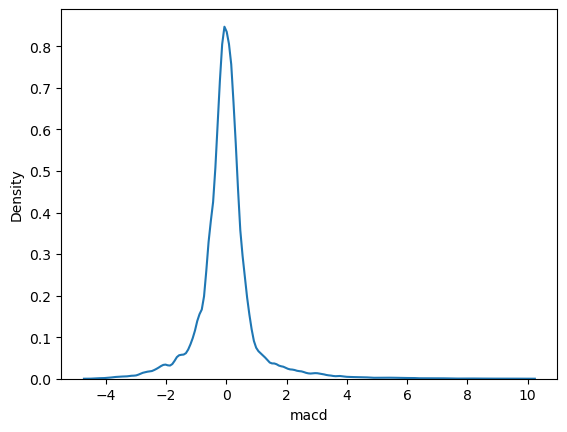

In [21]:
sns.kdeplot(df1['macd'])

In [22]:
df1['dollar vol']=df1['Adj Close']*df1['Volume']/1e6

In [23]:
df1

Adj Close       Close        High         Low        Open  \
date       ticker                                                               
2015-10-28 A        35.067650   37.520000   37.610001   36.770000   37.060001   
           AAL      43.731598   45.860001   46.360001   45.230000   46.200001   
           AAPL     27.029940   29.817499   29.825001   29.014999   29.232500   
           ABBV     37.699020   53.259998   53.840000   52.080002   52.820000   
           ABT      38.531666   44.759998   44.770000   43.639999   43.959999   
...                       ...         ...         ...         ...         ...   
2023-10-25 YUM     119.743599  120.309998  121.260002  119.510002  119.779999   
           ZBH     103.433678  103.639999  104.750000  103.220001  104.699997   
           ZBRA    198.910004  198.910004  205.229996  196.130005  203.830002   
           ZION     29.273745   29.629999   29.969999   28.900000   29.510000   
           ZTS     163.279068  163.669998  165.990005  162.350006  165.559998   

                        Volume  garman_klass_vol       rsi2        MB  \
date       ticker                                                       
2015-10-28 A         1780100.0         -0.000924        NaN       NaN   
           AAL       7629700.0         -0.000860        NaN       NaN   
           AAPL    342205600.0         -0.001991        NaN       NaN   
           ABBV      7869000.0         -0.043385        NaN       NaN   
           ABT       6158300.0         -0.006384        NaN       NaN   
...                        ...               ...        ...       ...   
2023-10-25 YUM        985800.0          0.000106  44.961224  4.441026   
           ZBH       1698500.0          0.000051  32.508310  4.408618   
           ZBRA       577900.0          0.000798  25.570518  4.533024   
           ZION      2713300.0          0.000636  32.666461  4.412707   
           ZTS       1273600.0          0.000171  27.415342  4.476254   

                         UB        LB  Bolband_width       atr      macd  \
date       ticker                                                          
2015-10-28 A            NaN       NaN            NaN       NaN       NaN   
           AAL          NaN       NaN            NaN       NaN       NaN   
           AAPL         NaN       NaN            NaN       NaN       NaN   
           ABBV         NaN       NaN            NaN       NaN       NaN   
           ABT          NaN       NaN            NaN       NaN       NaN   
...                     ...       ...            ...       ...       ...   
2023-10-25 YUM     5.923359  2.958693       1.482333 -0.370588 -0.481891   
           ZBH     5.851009  2.966227       1.442391 -0.464963 -0.476914   
           ZBRA    5.960225  3.105822       1.427202 -0.325622 -0.380019   
           ZION    5.912379  2.913035       1.499672 -0.427007 -0.377299   
           ZTS     6.011481  2.941027       1.535227 -0.215711 -0.316313   

                    dollar vol  
date       ticker               
2015-10-28 A         62.423923  
           AAL      333.658973  
           AAPL    9249.796716  
           ABBV     296.653591  
           ABT      237.289558  
...                        ...  
2023-10-25 YUM      118.043240  
           ZBH      175.682102  
           ZBRA     114.950091  
           ZION      79.428451  
           ZTS      207.952221  

[993608 rows x 15 columns]

In [24]:
#Aggregate to monthy level, to reduce number of rows and thereby reducing number of rows
a=df1.unstack('ticker')['dollar vol'].resample('M').mean().stack('ticker').to_frame('dollar vol')

In [25]:
last_col=[ i for i in df1.columns.unique(0) if i not in['dollar vol','Volume','Open','High','Low','Close']]

In [26]:
last_col

['Adj Close',
 'garman_klass_vol',
 'rsi2',
 'MB',
 'UB',
 'LB',
 'Bolband_width',
 'atr',
 'macd']

In [27]:
data=pd.concat([df1.unstack()[last_col].resample('M').last().stack('ticker'),a],axis=1).dropna()

In [28]:
data

Adj Close  Bolband_width        LB        MB        UB  \
date       ticker                                                            
2015-11-30 A        39.086582       0.890546  3.006177  3.896723  4.787268   
           AAL      39.429928       0.884773  2.980271  3.865044  4.749817   
           AAPL     26.924875       0.792714  2.974593  3.767307  4.560020   
           ABBV     41.160297       0.726384  3.080216  3.806601  4.532985   
           ABT      38.669395       0.718619  3.063531  3.782149  4.500768   
...                       ...            ...       ...       ...       ...   
2023-10-31 YUM     119.743599       1.482333  2.958693  4.441026  5.923359   
           ZBH     103.433678       1.442391  2.966227  4.408618  5.851009   
           ZBRA    198.910004       1.427202  3.105822  4.533024  5.960225   
           ZION     29.273745       1.499672  2.913035  4.412707  5.912379   
           ZTS     163.279068       1.535227  2.941027  4.476254  6.011481   

                        atr  garman_klass_vol      macd       rsi2  \
date       ticker                                                    
2015-11-30 A      -0.820545         -0.001902 -0.173610  75.466215   
           AAL    -0.851897         -0.000966 -0.185097  23.102612   
           AAPL   -0.884557         -0.003119 -0.209575  51.026628   
           ABBV   -0.840369         -0.053947 -0.228053  43.912036   
           ABT    -0.865822         -0.009962 -0.243447  46.998873   
...                     ...               ...       ...        ...   
2023-10-31 YUM    -0.370588          0.000106 -0.481891  44.961224   
           ZBH    -0.464963          0.000051 -0.476914  32.508310   
           ZBRA   -0.325622          0.000798 -0.380019  25.570518   
           ZION   -0.427007          0.000636 -0.377299  32.666461   
           ZTS    -0.215711          0.000171 -0.316313  27.415342   

                    dollar vol  
date       ticker               
2015-11-30 A        136.213745  
           AAL      287.915792  
           AAPL    4034.583577  
           ABBV     343.971766  
           ABT      213.736349  
...                        ...  
2023-10-31 YUM      194.596478  
           ZBH      174.138880  
           ZBRA      98.651751  
           ZION     119.914798  
           ZTS      247.342075  

[47407 rows x 10 columns]

In [29]:
data['dollar vol']=data.loc[:,'dollar vol'].unstack('ticker').rolling(60,min_periods=12).mean().stack() #Replacing dollar vol with 5 year rolling avg

In [30]:
#Dollar Volume Rank
data['dollar vol rank']=data.groupby('date')['dollar vol'].rank(ascending=False)

In [31]:
data

Adj Close  Bolband_width        LB        MB        UB  \
date       ticker                                                            
2015-11-30 A        39.086582       0.890546  3.006177  3.896723  4.787268   
           AAL      39.429928       0.884773  2.980271  3.865044  4.749817   
           AAPL     26.924875       0.792714  2.974593  3.767307  4.560020   
           ABBV     41.160297       0.726384  3.080216  3.806601  4.532985   
           ABT      38.669395       0.718619  3.063531  3.782149  4.500768   
...                       ...            ...       ...       ...       ...   
2023-10-31 YUM     119.743599       1.482333  2.958693  4.441026  5.923359   
           ZBH     103.433678       1.442391  2.966227  4.408618  5.851009   
           ZBRA    198.910004       1.427202  3.105822  4.533024  5.960225   
           ZION     29.273745       1.499672  2.913035  4.412707  5.912379   
           ZTS     163.279068       1.535227  2.941027  4.476254  6.011481   

                        atr  garman_klass_vol      macd       rsi2  \
date       ticker                                                    
2015-11-30 A      -0.820545         -0.001902 -0.173610  75.466215   
           AAL    -0.851897         -0.000966 -0.185097  23.102612   
           AAPL   -0.884557         -0.003119 -0.209575  51.026628   
           ABBV   -0.840369         -0.053947 -0.228053  43.912036   
           ABT    -0.865822         -0.009962 -0.243447  46.998873   
...                     ...               ...       ...        ...   
2023-10-31 YUM    -0.370588          0.000106 -0.481891  44.961224   
           ZBH    -0.464963          0.000051 -0.476914  32.508310   
           ZBRA   -0.325622          0.000798 -0.380019  25.570518   
           ZION   -0.427007          0.000636 -0.377299  32.666461   
           ZTS    -0.215711          0.000171 -0.316313  27.415342   

                   dollar vol  dollar vol rank  
date       ticker                               
2015-11-30 A              NaN              NaN  
           AAL            NaN              NaN  
           AAPL           NaN              NaN  
           ABBV           NaN              NaN  
           ABT            NaN              NaN  
...                       ...              ...  
2023-10-31 YUM     187.215696            255.0  
           ZBH     171.144638            281.0  
           ZBRA    124.404859            357.0  
           ZION     88.318044            444.0  
           ZTS     298.103290            156.0  

[47407 rows x 11 columns]

In [32]:
data['dollar vol rank'].describe()

count    41890.000000
mean       246.947983
std        142.329878
min          1.000000
25%        124.000000
50%        247.000000
75%        370.000000
max        500.000000
Name: dollar vol rank, dtype: float64

In [33]:
data=data[data['dollar vol rank']<150].drop(columns=['dollar vol rank','dollar vol'],axis=1)

In [34]:
data #Selecting top 150 most liquid stocks and then dropping the dollar volume since we do not care about liquidity anymore.

Adj Close  Bolband_width        LB        MB        UB  \
date       ticker                                                            
2016-10-31 AAL      39.134327       0.919153  3.035125  3.954278  4.873430   
           AAPL     26.281521       0.864774  2.987279  3.852053  4.716827   
           ABBV     41.009079       0.779029  3.114474  3.893503  4.672533   
           ABT      34.630020       0.725289  3.104394  3.829683  4.554972   
           ACN     104.350327       0.866603  2.985739  3.852342  4.718945   
...                       ...            ...       ...       ...       ...   
2023-10-31 VRTX    363.040009       1.997287  2.922519  4.919806  6.917093   
           VZ       33.689999       2.309628  2.109517  4.419145  6.728773   
           WFC      38.685123       2.199873  1.952594  4.152467  6.352341   
           WMT     162.157730       1.930550  2.091724  4.022274  5.952824   
           XOM     107.606010       1.451946  3.000753  4.452699  5.904645   

                        atr  garman_klass_vol      macd       rsi2  
date       ticker                                                   
2016-10-31 AAL    -0.829154         -0.000176 -0.138689  64.080858  
           AAPL   -0.865194         -0.002307 -0.176823  44.293299  
           ABBV   -0.828586         -0.041756 -0.208351  23.549746  
           ABT    -0.864563         -0.006476 -0.239159  35.221908  
           ACN    -0.724017         -0.004026 -0.242995  54.032204  
...                     ...               ...       ...        ...  
2023-10-31 VRTX    0.158959          0.000200  0.194231  52.723626  
           VZ     -0.223088          0.000221 -0.159545  62.589187  
           WFC    -0.508816          0.000093 -1.178474  36.903469  
           WMT    -0.283990          0.000050 -1.055894  56.919134  
           XOM    -0.263012          0.000052 -0.362699  42.535964  

[12665 rows x 9 columns]

In [35]:
#Calculating monthly returns for different time periods

In [36]:
data['returns_1mo']=data['Adj Close'].unstack('ticker').pct_change().stack('ticker')

In [37]:
data['returns_2mo']=data['Adj Close'].unstack('ticker').pct_change(2).stack('ticker')

In [38]:
return_periods=[1,2,3,6,9,12]
for i in return_periods:
    data[f'returns_{i}mo']=data['Adj Close'].unstack('ticker').pct_change(i).stack('ticker')

In [39]:
data

Adj Close  Bolband_width        LB        MB        UB  \
date       ticker                                                            
2016-10-31 AAL      39.134327       0.919153  3.035125  3.954278  4.873430   
           AAPL     26.281521       0.864774  2.987279  3.852053  4.716827   
           ABBV     41.009079       0.779029  3.114474  3.893503  4.672533   
           ABT      34.630020       0.725289  3.104394  3.829683  4.554972   
           ACN     104.350327       0.866603  2.985739  3.852342  4.718945   
...                       ...            ...       ...       ...       ...   
2023-10-31 VRTX    363.040009       1.997287  2.922519  4.919806  6.917093   
           VZ       33.689999       2.309628  2.109517  4.419145  6.728773   
           WFC      38.685123       2.199873  1.952594  4.152467  6.352341   
           WMT     162.157730       1.930550  2.091724  4.022274  5.952824   
           XOM     107.606010       1.451946  3.000753  4.452699  5.904645   

                        atr  garman_klass_vol      macd       rsi2  \
date       ticker                                                    
2016-10-31 AAL    -0.829154         -0.000176 -0.138689  64.080858   
           AAPL   -0.865194         -0.002307 -0.176823  44.293299   
           ABBV   -0.828586         -0.041756 -0.208351  23.549746   
           ABT    -0.864563         -0.006476 -0.239159  35.221908   
           ACN    -0.724017         -0.004026 -0.242995  54.032204   
...                     ...               ...       ...        ...   
2023-10-31 VRTX    0.158959          0.000200  0.194231  52.723626   
           VZ     -0.223088          0.000221 -0.159545  62.589187   
           WFC    -0.508816          0.000093 -1.178474  36.903469   
           WMT    -0.283990          0.000050 -1.055894  56.919134   
           XOM    -0.263012          0.000052 -0.362699  42.535964   

                   returns_1mo  returns_2mo  returns_3mo  returns_6mo  \
date       ticker                                                       
2016-10-31 AAL             NaN          NaN          NaN          NaN   
           AAPL            NaN          NaN          NaN          NaN   
           ABBV            NaN          NaN          NaN          NaN   
           ABT             NaN          NaN          NaN          NaN   
           ACN             NaN          NaN          NaN          NaN   
...                        ...          ...          ...          ...   
2023-10-31 VRTX       0.043998     0.042200     0.030368     0.065477   
           VZ         0.061682    -0.016320     0.009657    -0.097989   
           WFC       -0.044787    -0.054735    -0.147850    -0.002693   
           WMT        0.017695     0.000922     0.021760     0.086037   
           XOM       -0.076459    -0.023383     0.020889    -0.066840   

                   returns_9mo  returns_12mo  
date       ticker                             
2016-10-31 AAL             NaN           NaN  
           AAPL            NaN           NaN  
           ABBV            NaN           NaN  
           ABT             NaN           NaN  
           ACN             NaN           NaN  
...                        ...           ...  
2023-10-31 VRTX       0.123615      0.163590  
           VZ        -0.143499     -0.032259  
           WFC       -0.148798     -0.126923  
           WMT        0.144304      0.161046  
           XOM       -0.040773      0.012325  

[12665 rows x 15 columns]

Fama-French Factors

In [41]:
# Using Monthly Fama factors
factor_data=web.DataReader('F-F_Research_Data_5_Factors_2x3','famafrench',start='2010')[0].drop('RF',axis=1)
factor_data

Mkt-RF   SMB   HML   RMW   CMA
Date                                   
2010-01   -3.36  0.34  0.43 -1.27  0.46
2010-02    3.40  1.51  3.23 -0.27  1.43
2010-03    6.31  1.85  2.21 -0.65  1.69
2010-04    2.00  4.98  2.89  0.69  1.72
2010-05   -7.89  0.04 -2.44  1.30 -0.21
...         ...   ...   ...   ...   ...
2023-07    3.21  2.86  4.11 -0.57  0.57
2023-08   -2.39 -3.65 -1.06  3.43 -2.37
2023-09   -5.24 -1.80  1.52  1.86 -0.83
2023-10   -3.19 -4.04  0.19  2.46 -0.66
2023-11    8.84 -0.10  1.65 -3.89 -0.99

[167 rows x 5 columns]

In [42]:
factor_data.index=factor_data.index.to_timestamp()


In [43]:
factor_data=factor_data.resample('M').last()/100

In [44]:
factor_data.index.name='date'

In [45]:
factor_data=factor_data.join(data['returns_1mo']).sort_index()

In [46]:
factor_data.xs('AAPL',level=1).head()

Mkt-RF     SMB     HML     RMW     CMA  returns_1mo
date                                                           
2016-10-31 -0.0202 -0.0402  0.0409  0.0093  0.0028          NaN
2016-11-30  0.0486  0.0707  0.0821 -0.0018  0.0370    -0.021601
2016-12-31  0.0181  0.0041  0.0353  0.0122 -0.0023     0.047955
2017-01-31  0.0194 -0.0146 -0.0275 -0.0049 -0.0099     0.047746
2017-02-28  0.0357 -0.0222 -0.0167  0.0047 -0.0183     0.133778

In [47]:
factor_data.xs('GOOG',level=1).head()

Mkt-RF     SMB     HML     RMW     CMA  returns_1mo
date                                                           
2016-10-31 -0.0202 -0.0402  0.0409  0.0093  0.0028          NaN
2016-11-30  0.0486  0.0707  0.0821 -0.0018  0.0370    -0.033778
2016-12-31  0.0181  0.0041  0.0353  0.0122 -0.0023     0.018178
2017-01-31  0.0194 -0.0146 -0.0275 -0.0049 -0.0099     0.032352
2017-02-28  0.0357 -0.0222 -0.0167  0.0047 -0.0183     0.033158

In [48]:
factor_data

Mkt-RF     SMB     HML     RMW     CMA  returns_1mo
date       ticker                                                     
2016-10-31 AAL    -0.0202 -0.0402  0.0409  0.0093  0.0028          NaN
           AAPL   -0.0202 -0.0402  0.0409  0.0093  0.0028          NaN
           ABBV   -0.0202 -0.0402  0.0409  0.0093  0.0028          NaN
           ABT    -0.0202 -0.0402  0.0409  0.0093  0.0028          NaN
           ACN    -0.0202 -0.0402  0.0409  0.0093  0.0028          NaN
...                   ...     ...     ...     ...     ...          ...
2023-10-31 VRTX   -0.0319 -0.0404  0.0019  0.0246 -0.0066     0.043998
           VZ     -0.0319 -0.0404  0.0019  0.0246 -0.0066     0.061682
           WFC    -0.0319 -0.0404  0.0019  0.0246 -0.0066    -0.044787
           WMT    -0.0319 -0.0404  0.0019  0.0246 -0.0066     0.017695
           XOM    -0.0319 -0.0404  0.0019  0.0246 -0.0066    -0.076459

[12665 rows x 6 columns]

In [49]:
factor_data=factor_data.dropna()

In [50]:
obs=factor_data.groupby(level=1).size()
valid=obs[obs>=10]
valid

ticker
AAL     84
AAPL    84
ABBV    84
ABNB    23
ABT     84
        ..
WFC     84
WMT     84
WYNN    80
XOM     84
YUM     13
Length: 179, dtype: int64

In [51]:
factor_data=factor_data[factor_data.index.get_level_values('ticker').isin(valid.index)]

fa

In [52]:
factor_data

Mkt-RF     SMB     HML     RMW     CMA  returns_1mo
date       ticker                                                     
2016-11-30 AAL     0.0486  0.0707  0.0821 -0.0018  0.0370     0.146730
           AAPL    0.0486  0.0707  0.0821 -0.0018  0.0370    -0.021601
           ABBV    0.0486  0.0707  0.0821 -0.0018  0.0370     0.089997
           ABT     0.0486  0.0707  0.0821 -0.0018  0.0370    -0.029816
           ACN     0.0486  0.0707  0.0821 -0.0018  0.0370     0.027443
...                   ...     ...     ...     ...     ...          ...
2023-10-31 VRTX   -0.0319 -0.0404  0.0019  0.0246 -0.0066     0.043998
           VZ     -0.0319 -0.0404  0.0019  0.0246 -0.0066     0.061682
           WFC    -0.0319 -0.0404  0.0019  0.0246 -0.0066    -0.044787
           WMT    -0.0319 -0.0404  0.0019  0.0246 -0.0066     0.017695
           XOM    -0.0319 -0.0404  0.0019  0.0246 -0.0066    -0.076459

[12451 rows x 6 columns]

In [53]:
# Calculating Rolling FActor Betas
betas=factor_data.groupby(level=1,group_keys=False).apply(lambda x: RollingOLS(endog=x['returns_1mo'],
                                                                         exog=sm.add_constant(x.drop('returns_1mo',axis=1)),
                                                                         window=min(24,x.shape[0]),
                                                                         min_nobs=len(x.columns)+1).fit().params.drop('const',axis=1))
                                                                         

In [54]:
#Betas need to be shifted by 1 month, because beta for october will be known in November
data=data.join(betas.groupby('ticker').shift())

In [55]:
data

Adj Close  Bolband_width        LB        MB        UB  \
date       ticker                                                            
2016-10-31 AAL      39.134327       0.919153  3.035125  3.954278  4.873430   
           AAPL     26.281521       0.864774  2.987279  3.852053  4.716827   
           ABBV     41.009079       0.779029  3.114474  3.893503  4.672533   
           ABT      34.630020       0.725289  3.104394  3.829683  4.554972   
           ACN     104.350327       0.866603  2.985739  3.852342  4.718945   
...                       ...            ...       ...       ...       ...   
2023-10-31 VRTX    363.040009       1.997287  2.922519  4.919806  6.917093   
           VZ       33.689999       2.309628  2.109517  4.419145  6.728773   
           WFC      38.685123       2.199873  1.952594  4.152467  6.352341   
           WMT     162.157730       1.930550  2.091724  4.022274  5.952824   
           XOM     107.606010       1.451946  3.000753  4.452699  5.904645   

                        atr  garman_klass_vol      macd       rsi2  \
date       ticker                                                    
2016-10-31 AAL    -0.829154         -0.000176 -0.138689  64.080858   
           AAPL   -0.865194         -0.002307 -0.176823  44.293299   
           ABBV   -0.828586         -0.041756 -0.208351  23.549746   
           ABT    -0.864563         -0.006476 -0.239159  35.221908   
           ACN    -0.724017         -0.004026 -0.242995  54.032204   
...                     ...               ...       ...        ...   
2023-10-31 VRTX    0.158959          0.000200  0.194231  52.723626   
           VZ     -0.223088          0.000221 -0.159545  62.589187   
           WFC    -0.508816          0.000093 -1.178474  36.903469   
           WMT    -0.283990          0.000050 -1.055894  56.919134   
           XOM    -0.263012          0.000052 -0.362699  42.535964   

                   returns_1mo  returns_2mo  returns_3mo  returns_6mo  \
date       ticker                                                       
2016-10-31 AAL             NaN          NaN          NaN          NaN   
           AAPL            NaN          NaN          NaN          NaN   
           ABBV            NaN          NaN          NaN          NaN   
           ABT             NaN          NaN          NaN          NaN   
           ACN             NaN          NaN          NaN          NaN   
...                        ...          ...          ...          ...   
2023-10-31 VRTX       0.043998     0.042200     0.030368     0.065477   
           VZ         0.061682    -0.016320     0.009657    -0.097989   
           WFC       -0.044787    -0.054735    -0.147850    -0.002693   
           WMT        0.017695     0.000922     0.021760     0.086037   
           XOM       -0.076459    -0.023383     0.020889    -0.066840   

                   returns_9mo  returns_12mo    Mkt-RF       SMB       HML  \
date       ticker                                                            
2016-10-31 AAL             NaN           NaN       NaN       NaN       NaN   
           AAPL            NaN           NaN       NaN       NaN       NaN   
           ABBV            NaN           NaN       NaN       NaN       NaN   
           ABT             NaN           NaN       NaN       NaN       NaN   
           ACN             NaN           NaN       NaN       NaN       NaN   
...                        ...           ...       ...       ...       ...   
2023-10-31 VRTX       0.123615      0.163590  0.468050 -0.423025 -0.340930   
           VZ        -0.143499     -0.032259  0.346019 -0.147679  0.247264   
           WFC       -0.148798     -0.126923  1.117865  0.294143  2.071039   
           WMT        0.144304      0.161046  0.712578 -0.295618 -0.443584   
           XOM       -0.040773      0.012325  0.989170 -1.084269  1.777349   

                        RMW       CMA  
date       ticker                      
2016-10-31 AAL          NaN       NaN  
         

In [56]:
# Filling factors with their mean
factors=['Mkt-RF','SMB','HML','RMW','CMA']
data.loc[:,factors]=data.groupby('ticker',group_keys=False).apply(lambda x: x.fillna(x.mean()))

In [57]:
data=data.dropna()

In [58]:
data=data.drop('Adj Close',axis=1)

In [59]:
data

Bolband_width        LB        MB        UB       atr  \
date       ticker                                                          
2017-10-31 AAL          0.929247  3.269724  4.198970  5.128217 -0.790669   
           AAPL         0.845933  3.260957  4.106890  4.952823 -0.830914   
           ABBV         0.735405  3.435463  4.170868  4.906273 -0.752599   
           ABT          0.627862  3.473338  4.101200  4.729063 -0.798289   
           ACN          0.784462  3.354994  4.139455  4.923917 -0.631013   
...                          ...       ...       ...       ...       ...   
2023-10-31 VRTX         1.997287  2.922519  4.919806  6.917093  0.158959   
           VZ           2.309628  2.109517  4.419145  6.728773 -0.223088   
           WFC          2.199873  1.952594  4.152467  6.352341 -0.508816   
           WMT          1.930550  2.091724  4.022274  5.952824 -0.283990   
           XOM          1.451946  3.000753  4.452699  5.904645 -0.263012   

                   garman_klass_vol      macd       rsi2  returns_1mo  \
date       ticker                                                       
2017-10-31 AAL            -0.000363 -0.120040  35.676834    -0.014108   
           AAPL           -0.000945 -0.161063  74.606716     0.096808   
           ABBV           -0.029822 -0.183888  50.876372     0.022728   
           ABT            -0.004349 -0.210920  49.081147     0.021275   
           ACN            -0.003359 -0.215653  71.187343     0.064180   
...                             ...       ...        ...          ...   
2023-10-31 VRTX            0.000200  0.194231  52.723626     0.043998   
           VZ              0.000221 -0.159545  62.589187     0.061682   
           WFC             0.000093 -1.178474  36.903469    -0.044787   
           WMT             0.000050 -1.055894  56.919134     0.017695   
           XOM             0.000052 -0.362699  42.535964    -0.076459   

                   returns_2mo  returns_3mo  returns_6mo  returns_9mo  \
date       ticker                                                       
2017-10-31 AAL        0.046491    -0.069886     0.103144     0.064872   
           AAPL       0.030732     0.141020     0.186247     0.410326   
           ABBV       0.206901     0.299952     0.390605     0.515444   
           ABT        0.069793     0.108078     0.255656     0.319895   
           ACN        0.099257     0.115811     0.184986     0.275402   
...                        ...          ...          ...          ...   
2023-10-31 VRTX       0.042200     0.030368     0.065477     0.123615   
           VZ        -0.016320     0.009657    -0.097989    -0.143499   
           WFC       -0.054735    -0.147850    -0.002693    -0.148798   
           WMT        0.000922     0.021760     0.086037     0.144304   
           XOM       -0.023383     0.020889    -0.066840    -0.040773   

                   returns_12mo    Mkt-RF       SMB       HML       RMW  \
date       ticker                                                         
2017-10-31 AAL         0.163535  1.353623  1.158971  0.683672  0.639392   
           AAPL        0.515077  1.112926 -0.210950 -0.616299  0.677977   
           ABBV        0.677002  0.602300  0.155041  0.100975 -0.176700   
           ABT         0.414071  0.855874 -0.233321 -0.511076  0.151361   
           ACN         0.249398  1.164820 -0.154314 -0.299142  0.256991   
...                         ...       ...       ...       ...       ...   
2023-10-31 VRTX        0.163590  0.468050 -0.423025 -0.340930 -0.070414   
           VZ         -0.032259  0.346019 -0.147679  0.247264  0.301271   
           WFC        -0.126923  1.117865  0.294143  2.071039 -0.436996   
           WMT         0.161046  0.712578 -0.295618 -0.443584 -0.150594   
           XOM         0.012325  0.989170 -1.084269  1.777349 -0.625601   

                        CMA  
date       ticker            
2017-10-31 AAL     0.347372  
           AAPL   -0.077315  
           ABBV   -0.012377  
    

In [60]:
# End of Data Preprocessing and Feature Creation

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10452 entries, (Timestamp('2017-10-31 00:00:00'), 'AAL') to (Timestamp('2023-10-31 00:00:00'), 'XOM')
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Bolband_width     10452 non-null  float64
 1   LB                10452 non-null  float64
 2   MB                10452 non-null  float64
 3   UB                10452 non-null  float64
 4   atr               10452 non-null  float64
 5   garman_klass_vol  10452 non-null  float64
 6   macd              10452 non-null  float64
 7   rsi2              10452 non-null  float64
 8   returns_1mo       10452 non-null  float64
 9   returns_2mo       10452 non-null  float64
 10  returns_3mo       10452 non-null  float64
 11  returns_6mo       10452 non-null  float64
 12  returns_9mo       10452 non-null  float64
 13  returns_12mo      10452 non-null  float64
 14  Mkt-RF            10452 non-null  float64
 15  SMB        

In [86]:
# we will use Clustering Algorithm to split data into specific clusters first
#Using 4 clusters 
from sklearn.cluster import KMeans
def get_cluster(df):
    data=df.copy()
    data['cluster']=KMeans(n_clusters=4,random_state=42,init='random').fit(data).labels_
    return data
data=data.dropna().groupby('date',group_keys=False).apply(get_cluster)

In [87]:
data

Bolband_width        LB        MB        UB       atr  \
date       ticker                                                          
2017-10-31 AAL          0.929247  3.269724  4.198970  5.128217 -0.790669   
           AAPL         0.845933  3.260957  4.106890  4.952823 -0.830914   
           ABBV         0.735405  3.435463  4.170868  4.906273 -0.752599   
           ABT          0.627862  3.473338  4.101200  4.729063 -0.798289   
           ACN          0.784462  3.354994  4.139455  4.923917 -0.631013   
...                          ...       ...       ...       ...       ...   
2023-10-31 VRTX         1.997287  2.922519  4.919806  6.917093  0.158959   
           VZ           2.309628  2.109517  4.419145  6.728773 -0.223088   
           WFC          2.199873  1.952594  4.152467  6.352341 -0.508816   
           WMT          1.930550  2.091724  4.022274  5.952824 -0.283990   
           XOM          1.451946  3.000753  4.452699  5.904645 -0.263012   

                   garman_klass_vol      macd       rsi2  returns_1mo  \
date       ticker                                                       
2017-10-31 AAL            -0.000363 -0.120040  35.676834    -0.014108   
           AAPL           -0.000945 -0.161063  74.606716     0.096808   
           ABBV           -0.029822 -0.183888  50.876372     0.022728   
           ABT            -0.004349 -0.210920  49.081147     0.021275   
           ACN            -0.003359 -0.215653  71.187343     0.064180   
...                             ...       ...        ...          ...   
2023-10-31 VRTX            0.000200  0.194231  52.723626     0.043998   
           VZ              0.000221 -0.159545  62.589187     0.061682   
           WFC             0.000093 -1.178474  36.903469    -0.044787   
           WMT             0.000050 -1.055894  56.919134     0.017695   
           XOM             0.000052 -0.362699  42.535964    -0.076459   

                   returns_2mo  returns_3mo  returns_6mo  returns_9mo  \
date       ticker                                                       
2017-10-31 AAL        0.046491    -0.069886     0.103144     0.064872   
           AAPL       0.030732     0.141020     0.186247     0.410326   
           ABBV       0.206901     0.299952     0.390605     0.515444   
           ABT        0.069793     0.108078     0.255656     0.319895   
           ACN        0.099257     0.115811     0.184986     0.275402   
...                        ...          ...          ...          ...   
2023-10-31 VRTX       0.042200     0.030368     0.065477     0.123615   
           VZ        -0.016320     0.009657    -0.097989    -0.143499   
           WFC       -0.054735    -0.147850    -0.002693    -0.148798   
           WMT        0.000922     0.021760     0.086037     0.144304   
           XOM       -0.023383     0.020889    -0.066840    -0.040773   

                   returns_12mo    Mkt-RF       SMB       HML       RMW  \
date       ticker                                                         
2017-10-31 AAL         0.163535  1.353623  1.158971  0.683672  0.639392   
           AAPL        0.515077  1.112926 -0.210950 -0.616299  0.677977   
           ABBV        0.677002  0.602300  0.155041  0.100975 -0.176700   
           ABT         0.414071  0.855874 -0.233321 -0.511076  0.151361   
           ACN         0.249398  1.164820 -0.154314 -0.299142  0.256991   
...                         ...       ...       ...       ...       ...   
2023-10-31 VRTX        0.163590  0.468050 -0.423025 -0.340930 -0.070414   
           VZ         -0.032259  0.346019 -0.147679  0.247264  0.301271   
           WFC        -0.126923  1.117865  0.294143  2.071039 -0.436996   
           WMT         0.161046  0.712578 -0.295618 -0.443584 -0.150594   
           XOM         0.012325  0.989170 -1.084269  1.777349 -0.625601   

                        CMA  cluster  
date       ticker                     
2017-10-31 AAL     0.347372        0  
           AAPL   -0.077315        2 

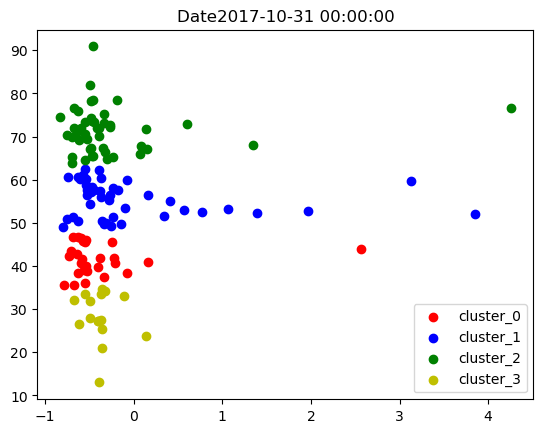

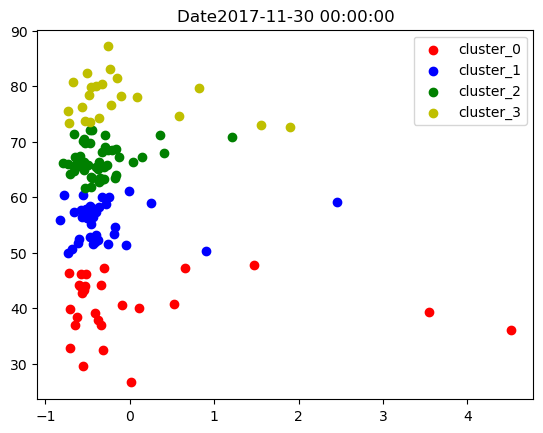

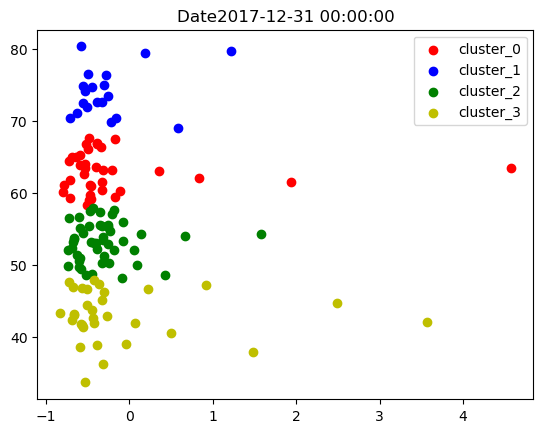

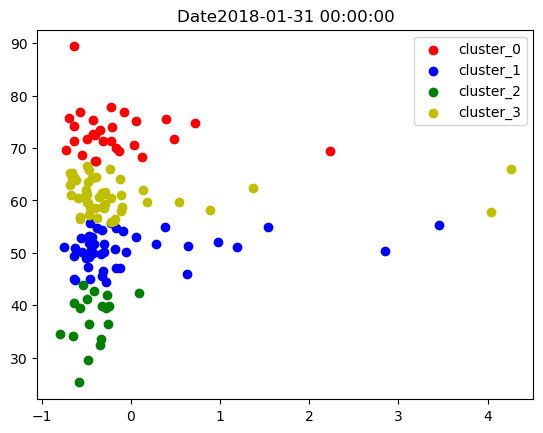

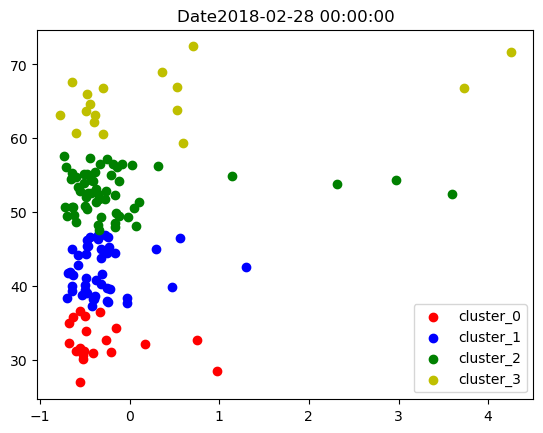

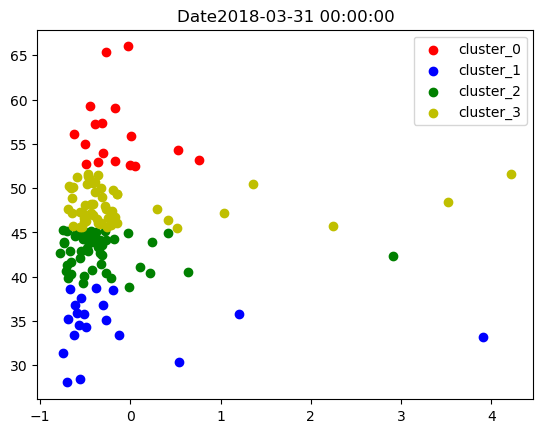

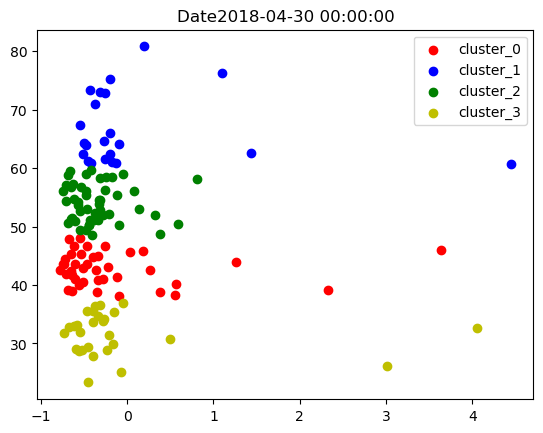

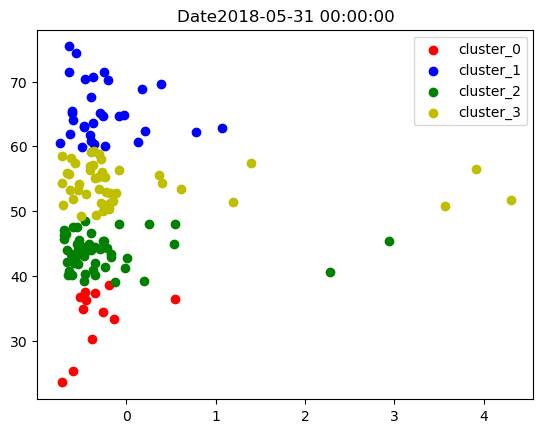

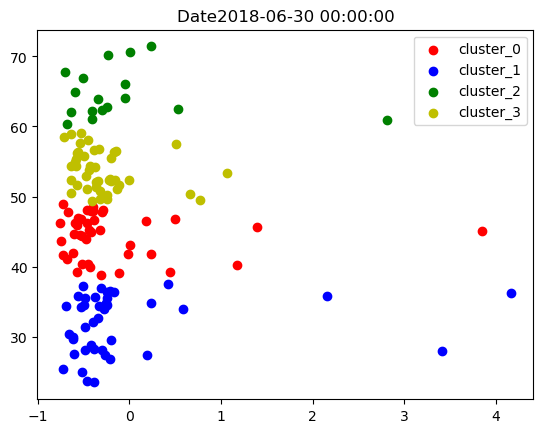

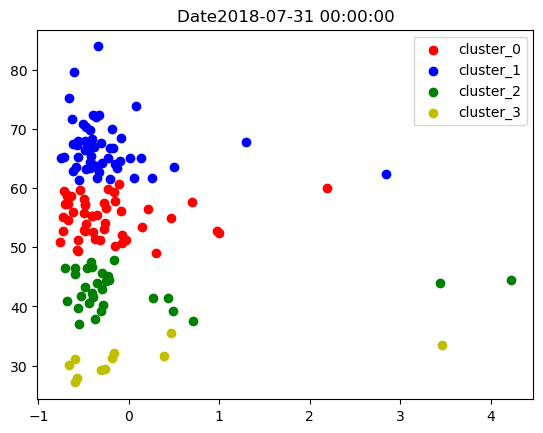

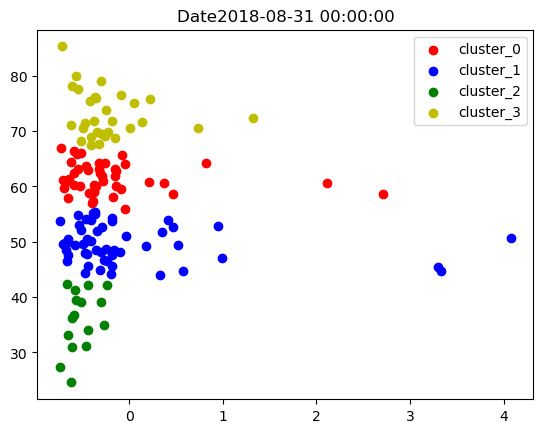

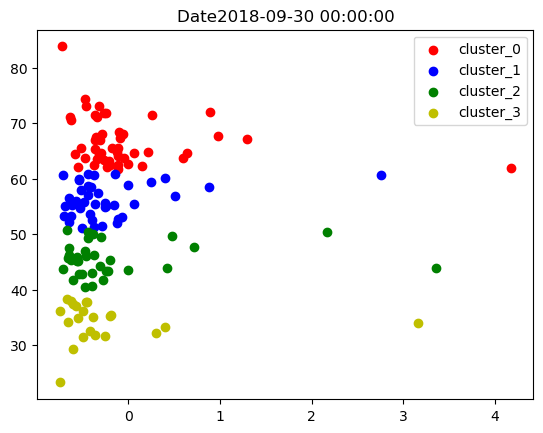

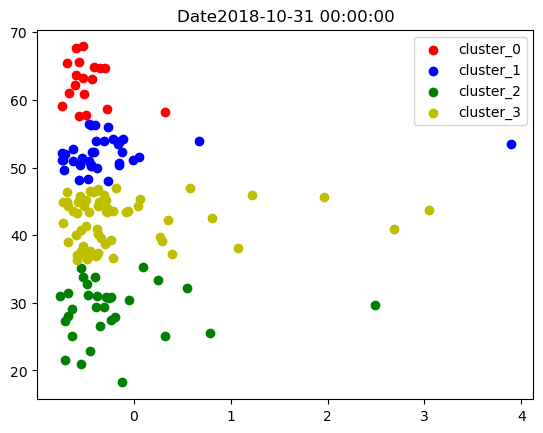

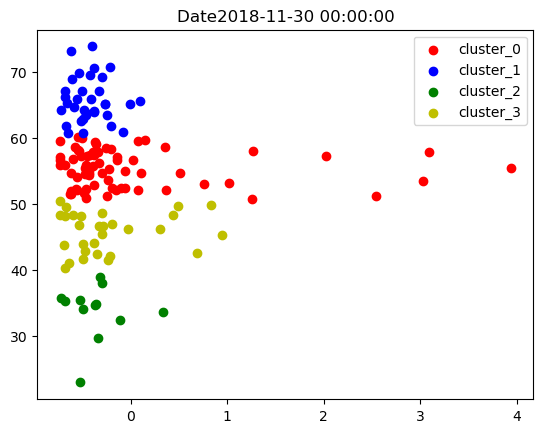

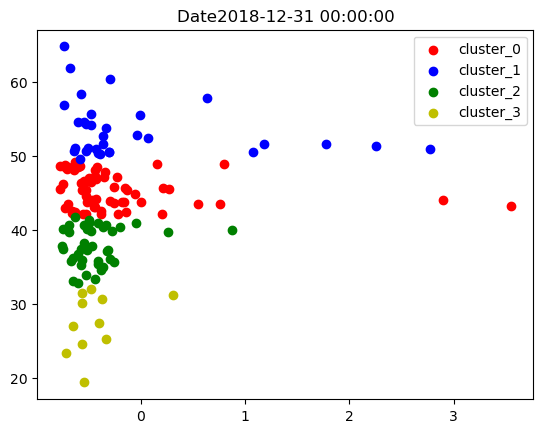

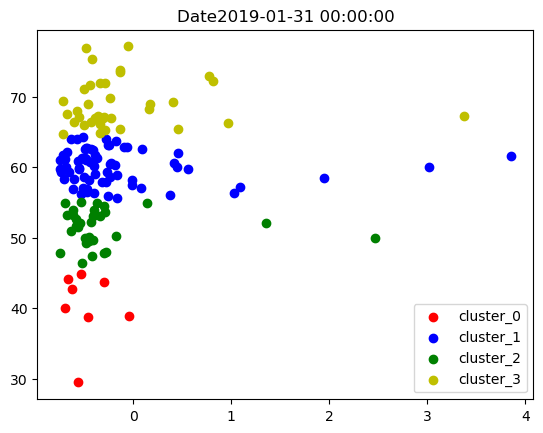

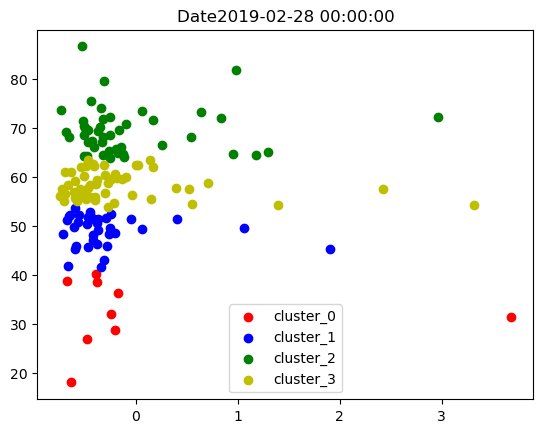

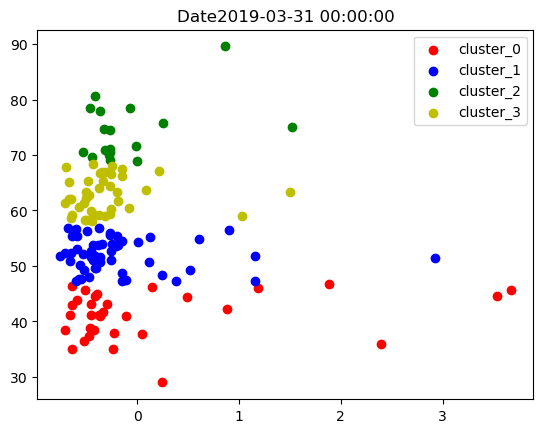

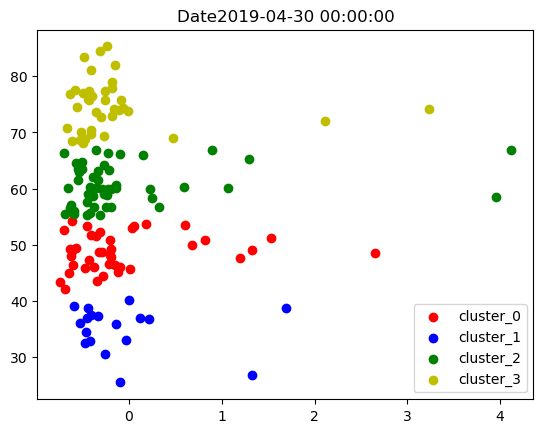

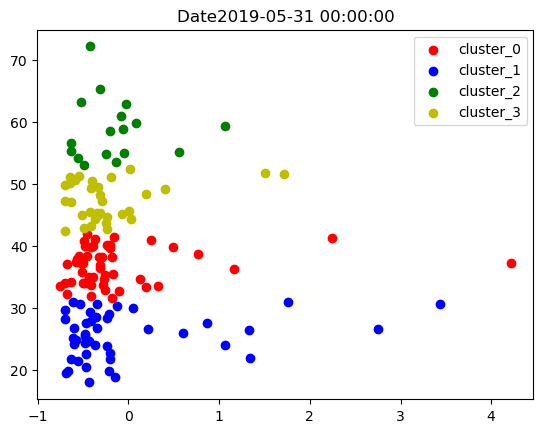

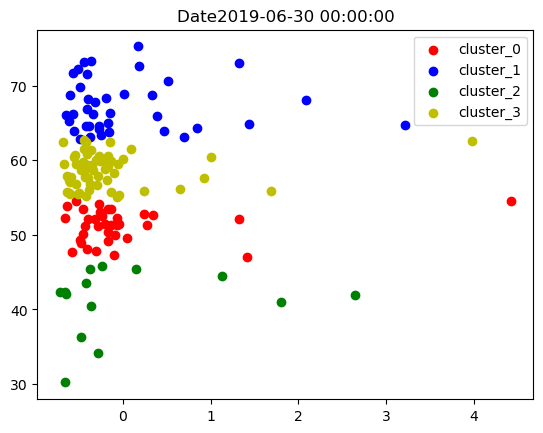

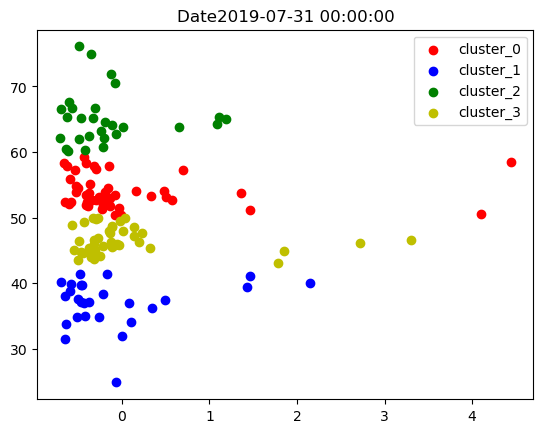

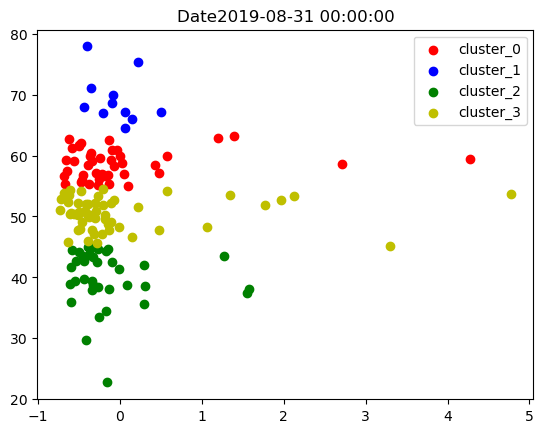

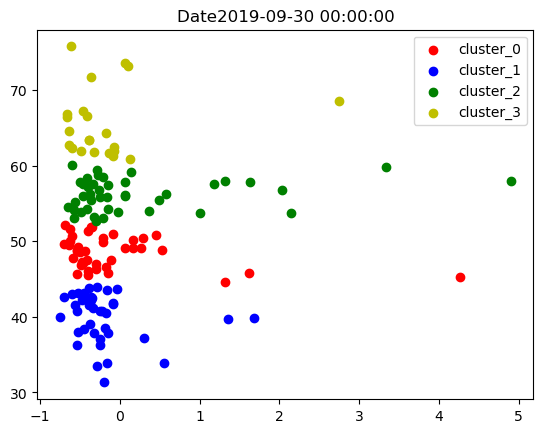

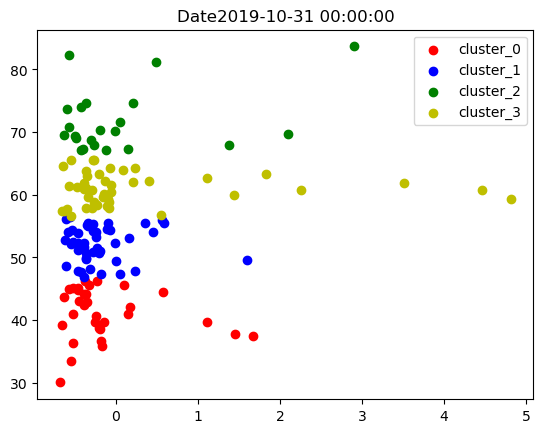

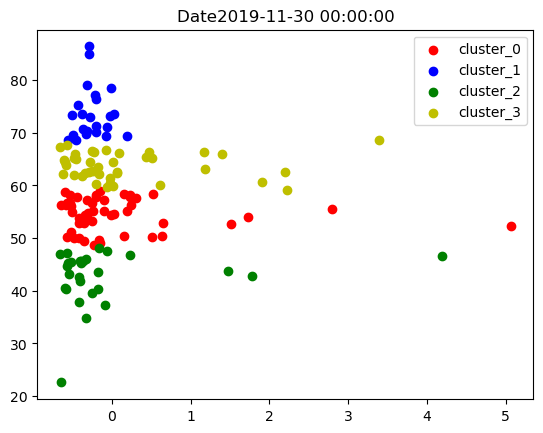

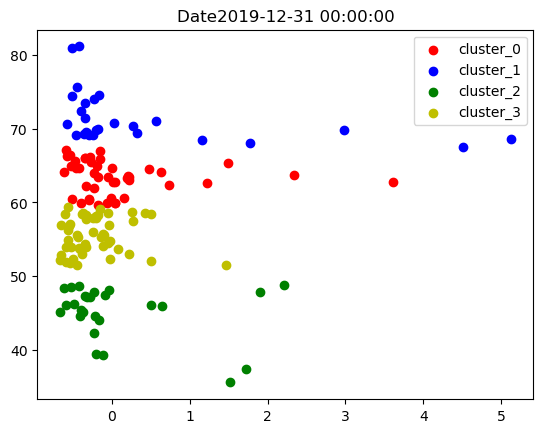

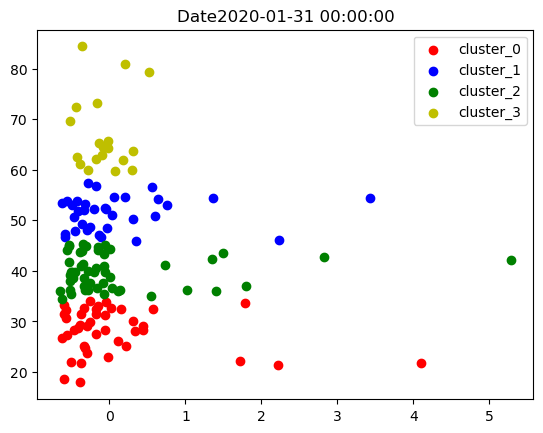

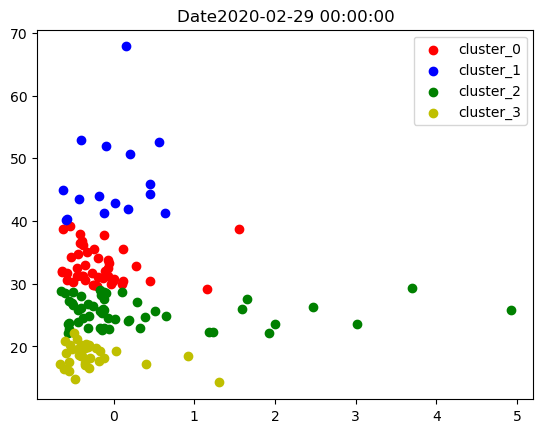

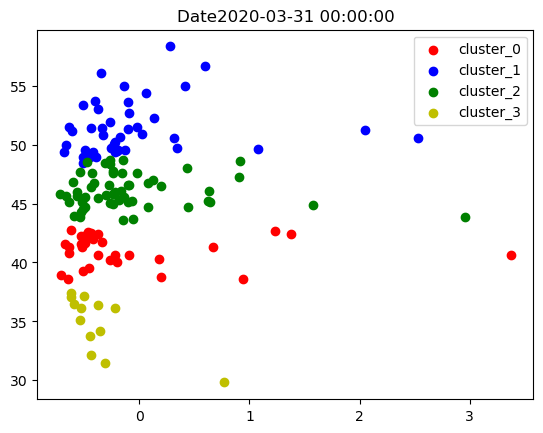

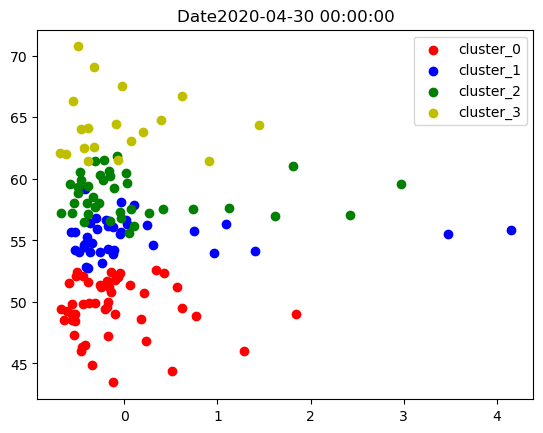

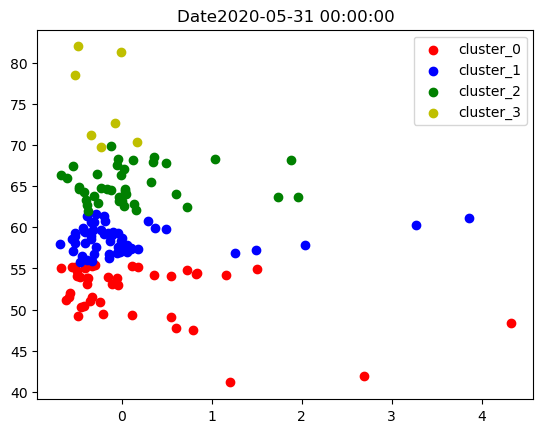

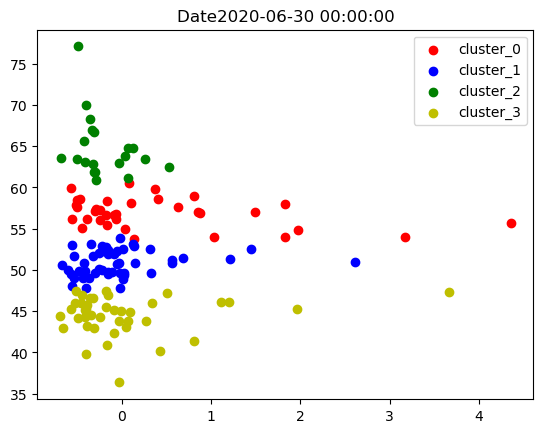

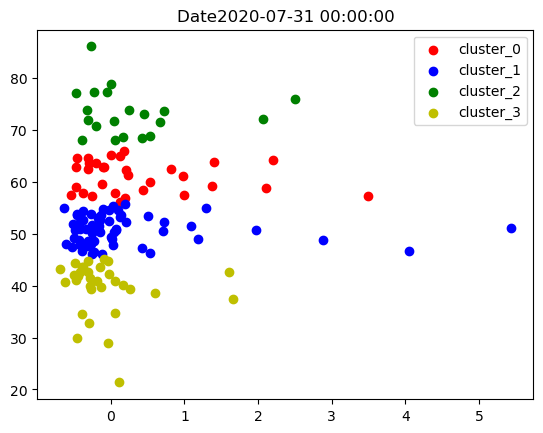

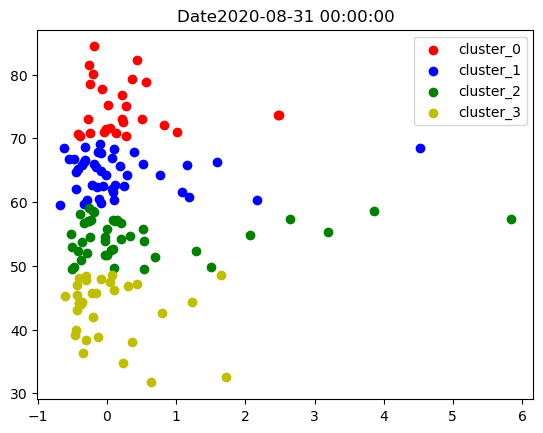

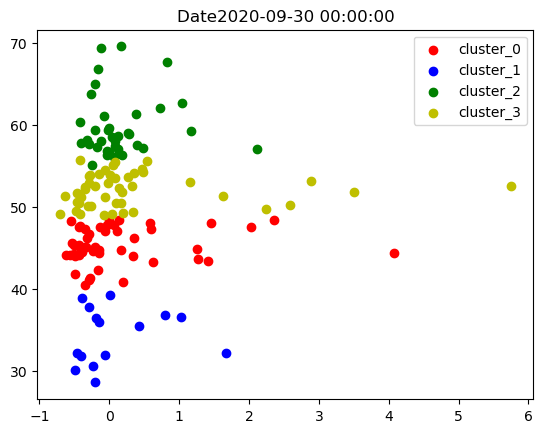

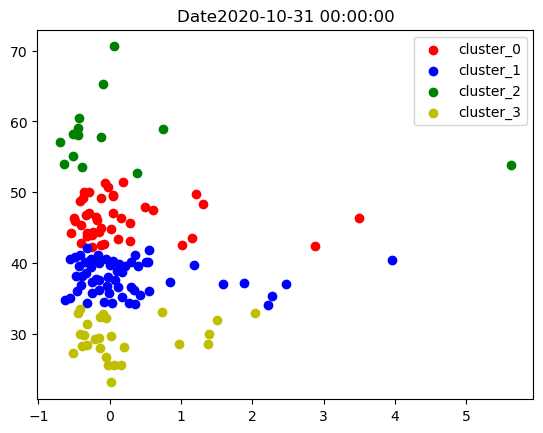

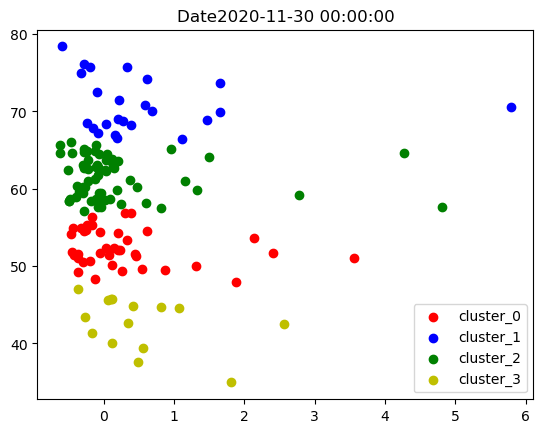

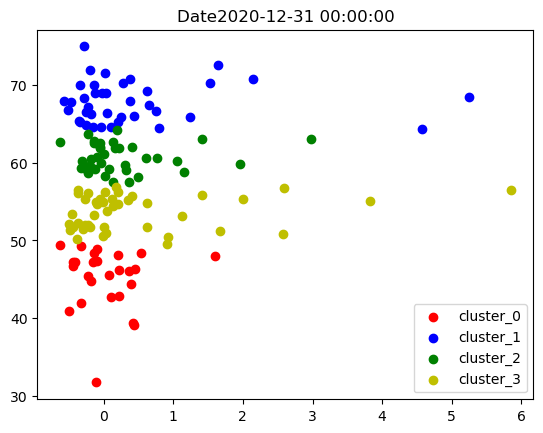

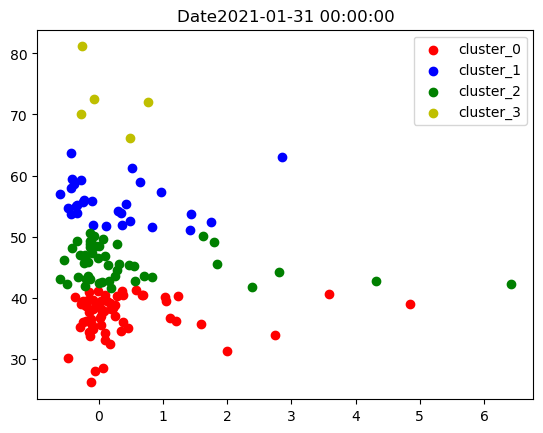

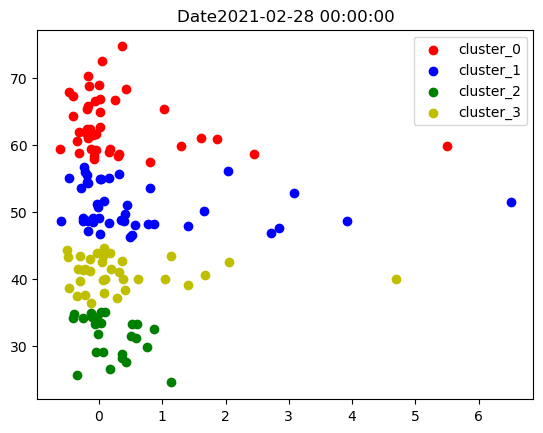

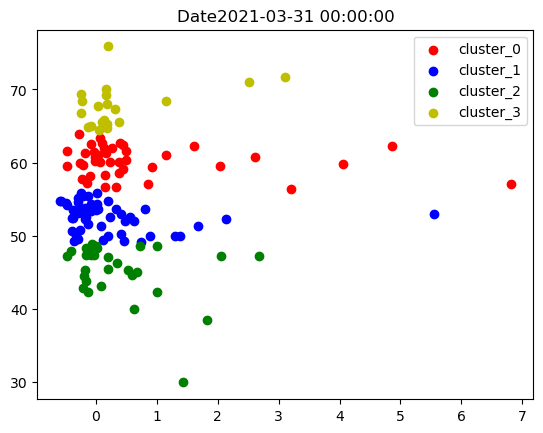

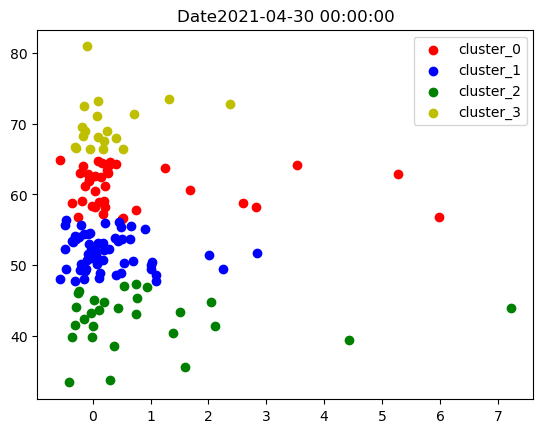

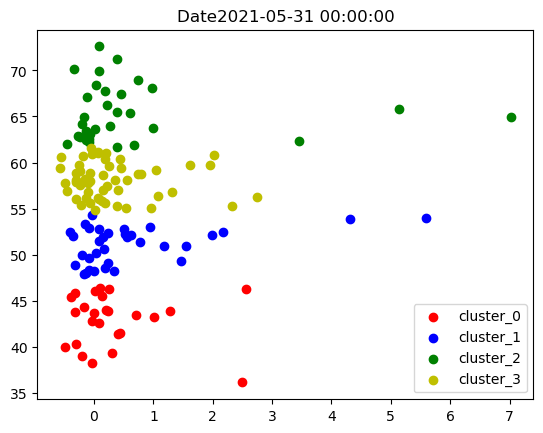

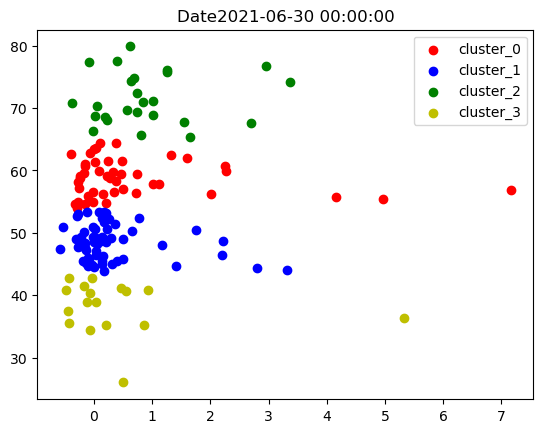

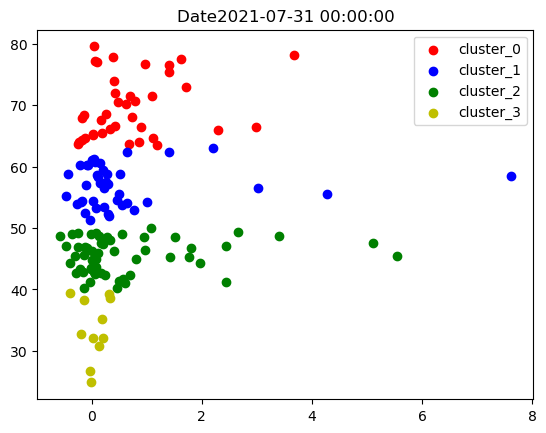

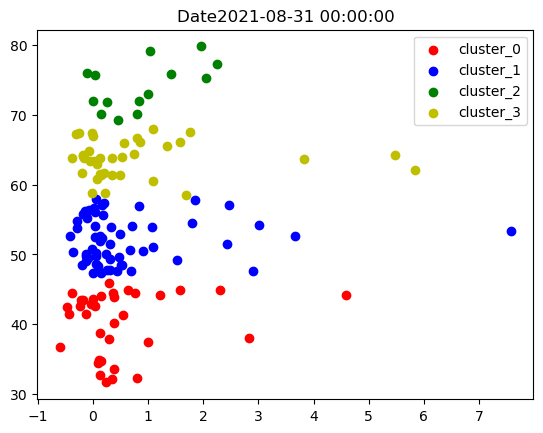

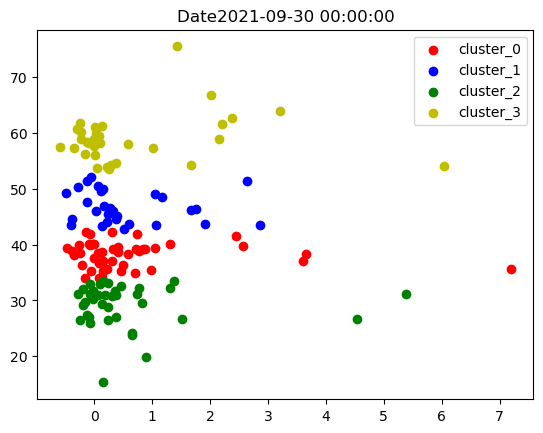

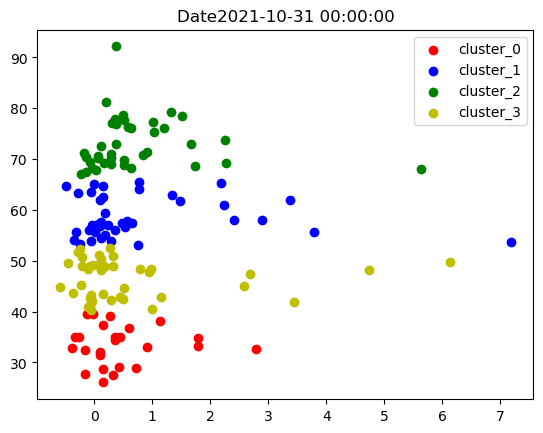

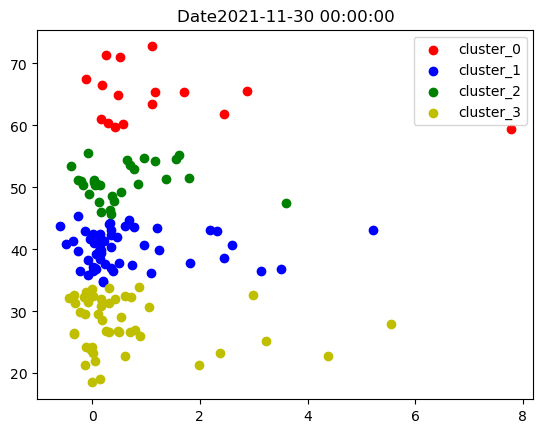

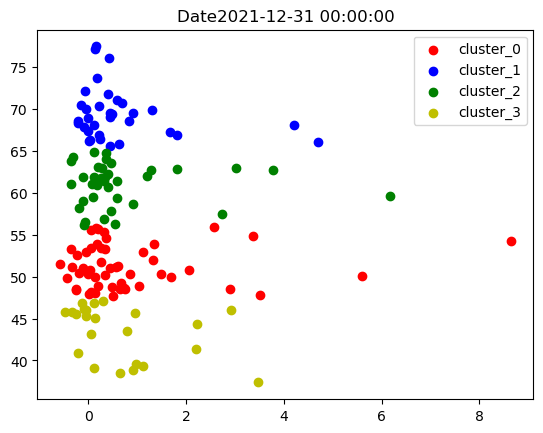

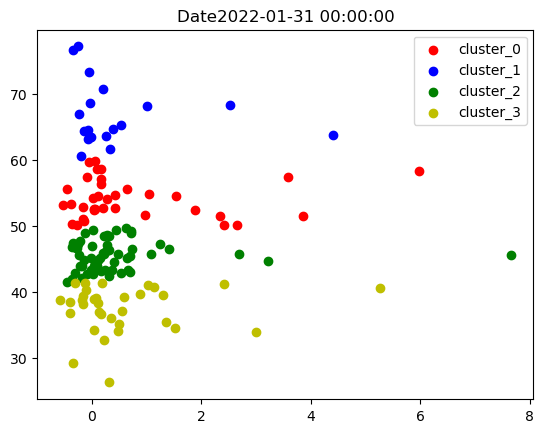

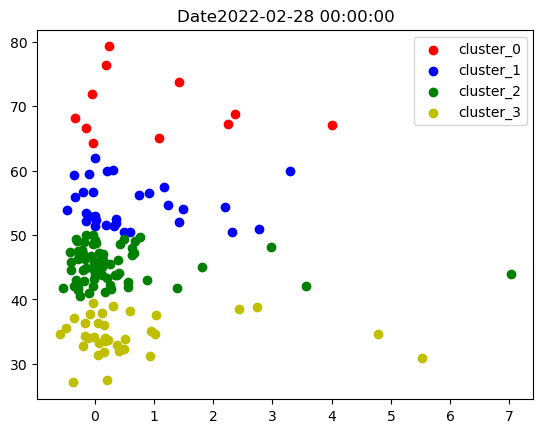

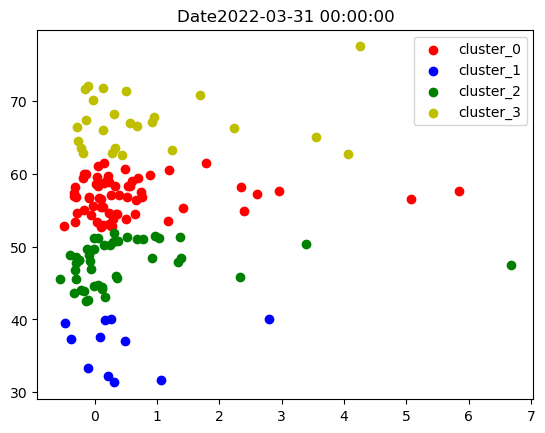

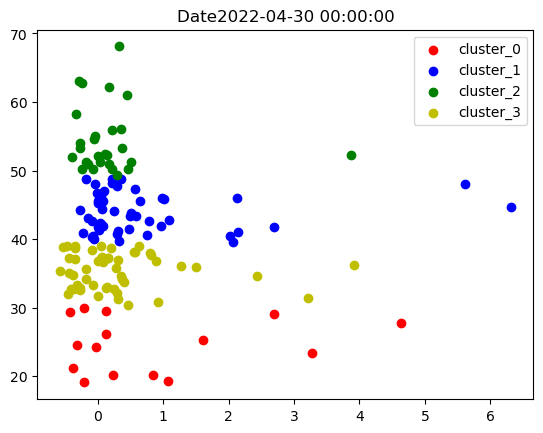

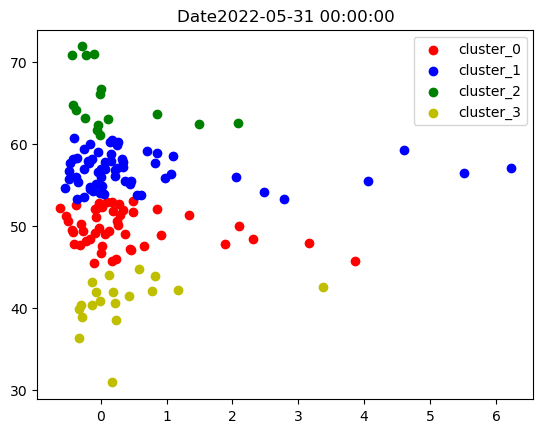

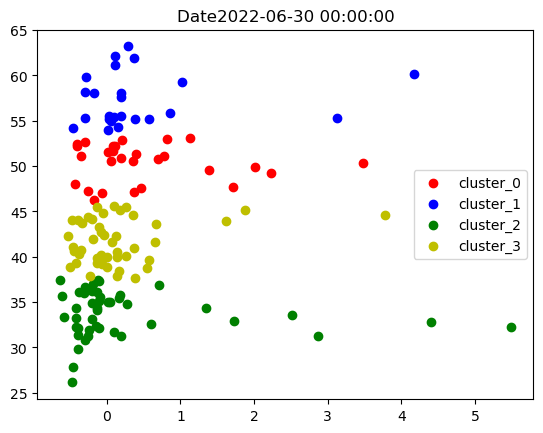

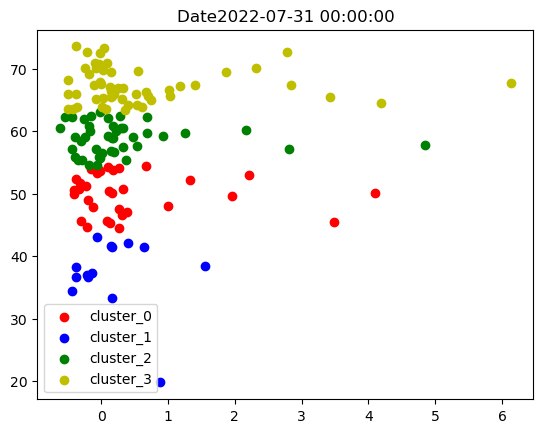

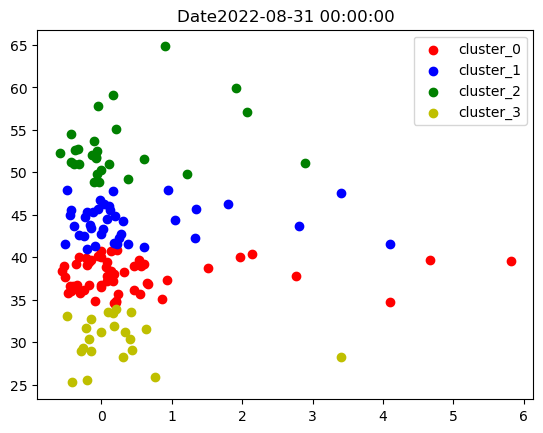

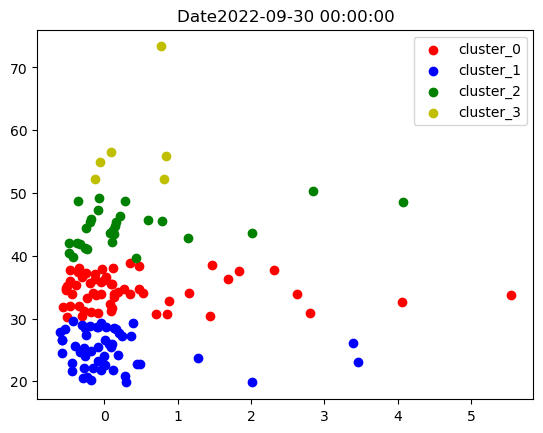

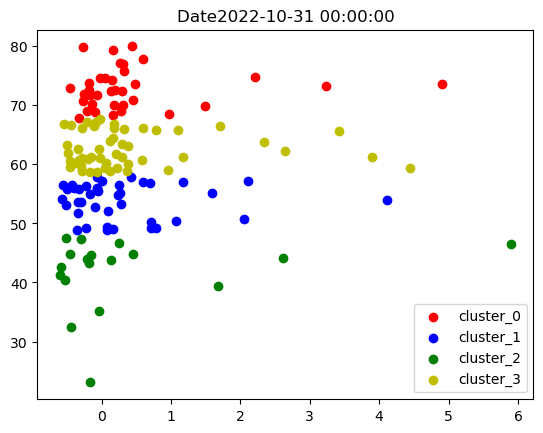

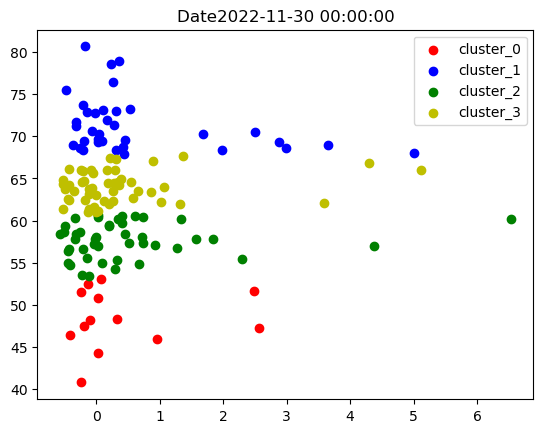

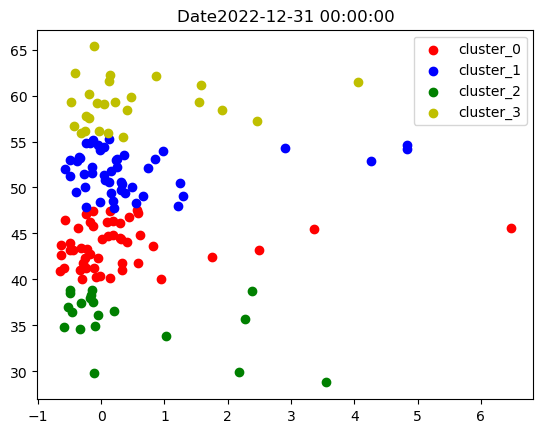

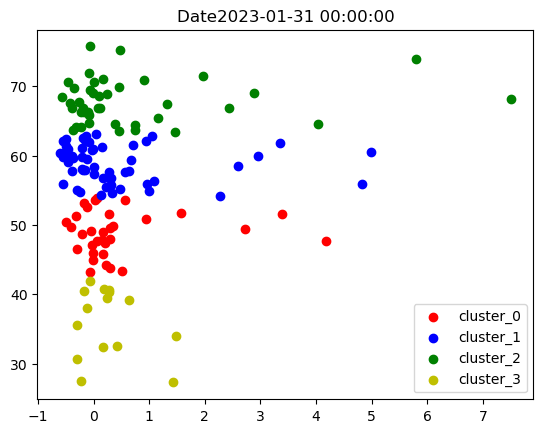

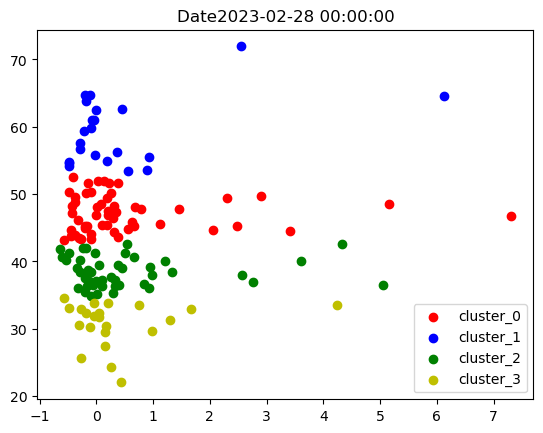

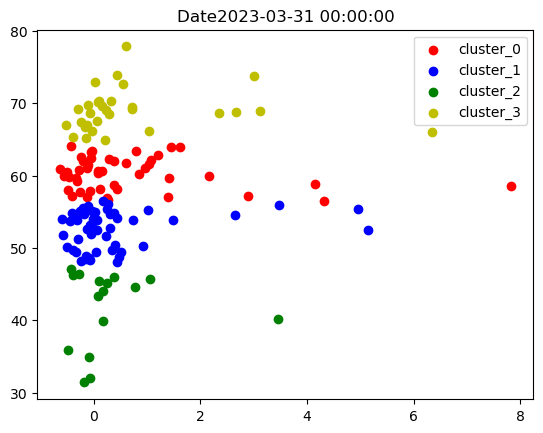

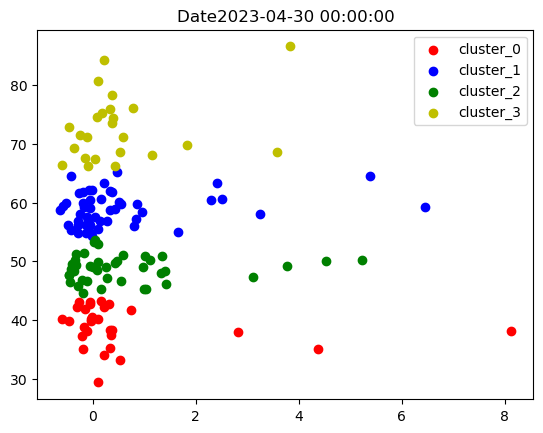

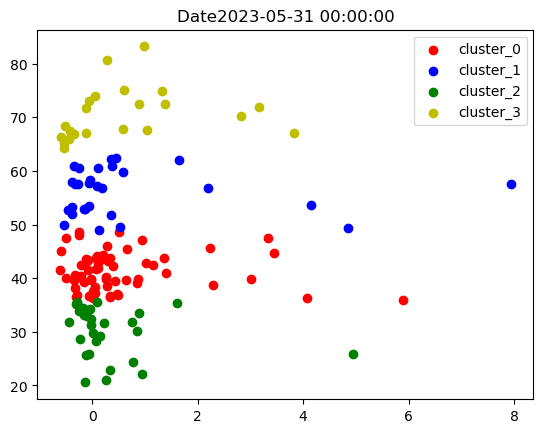

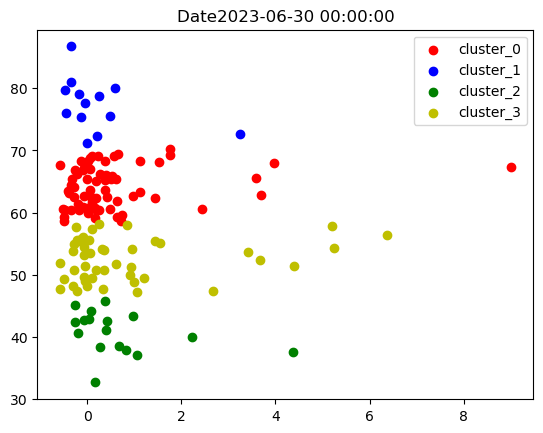

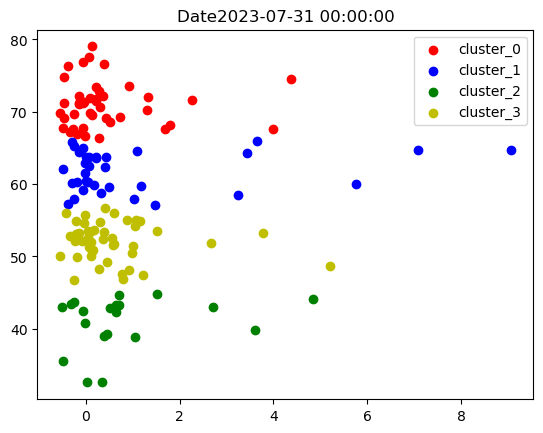

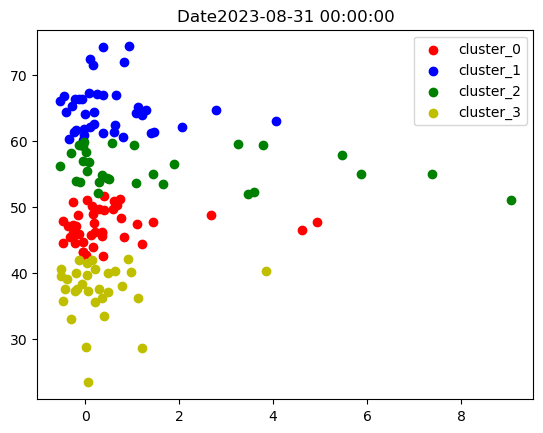

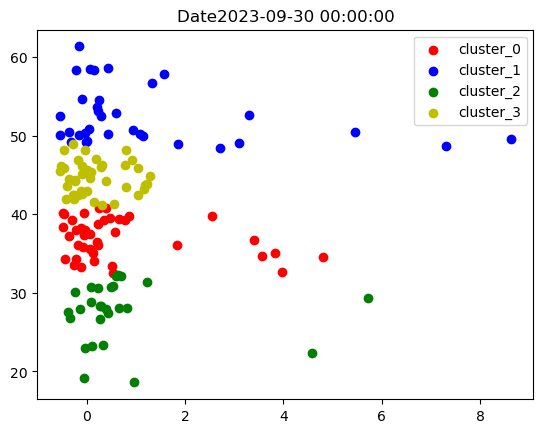

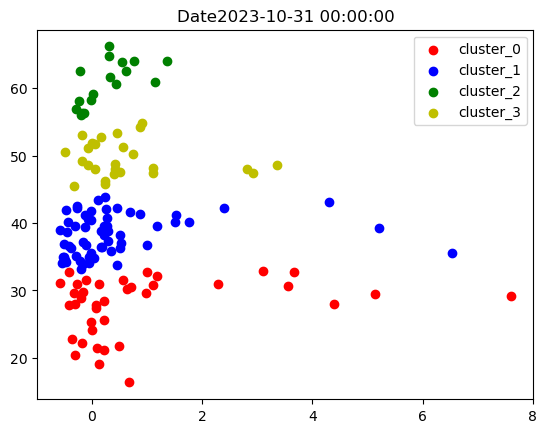

In [88]:
#Visualisation
# We are clustering based on atr i.e 5th column and RSI i.w 8th column
import matplotlib.pyplot as plt
def plot_clusters(data):
    c0=data[data['cluster']==0]
    c1=data[data['cluster']==1]
    c2=data[data['cluster']==2]
    c3=data[data['cluster']==3]

    plt.scatter(c0.iloc[:,4],c0.iloc[:,7],color='r',label='cluster_0')
    plt.scatter(c1.iloc[:,4],c1.iloc[:,7],color='b',label='cluster_1')
    plt.scatter(c2.iloc[:,4],c2.iloc[:,7],color='g',label='cluster_2')
    plt.scatter(c3.iloc[:,4],c3.iloc[:,7],color='y',label='cluster_3')

    plt.legend()
    plt.show()
    return
for i in data.index.get_level_values('date').unique().tolist():
    g=data.xs(i,level=0)
    plt.title(f'Date{i}')
    plot_clusters(g)

In [89]:
# Clustering is not good enough, normalisation of features required

# Applying pre-defined centroids  of Clusters

In [90]:
rsi_target=[30,45,55,70]
initial_centroids=np.zeros((len(rsi_target),19))

In [91]:
initial_centroids

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]])

In [92]:
initial_centroids[:,7]=rsi_target
initial_centroids

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0., 30.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., 45.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., 55.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., 70.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.]])

In [93]:
data=data.drop('cluster',axis=1)

In [94]:

def get_cluster_updated(df):
    data=df.copy()
    data['cluster']=KMeans(n_clusters=4,random_state=42,init=initial_centroids).fit(data).labels_
    return data
data=data.dropna().groupby('date',group_keys=False).apply(get_cluster_updated)

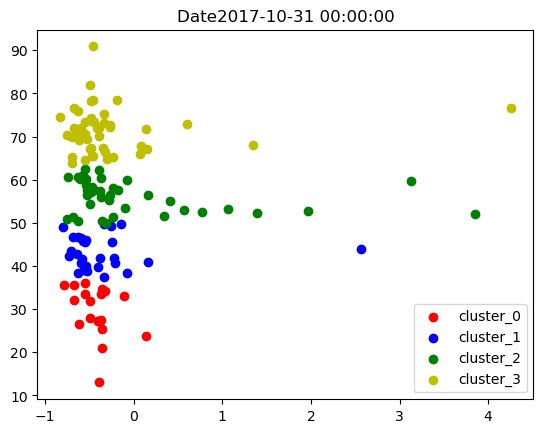

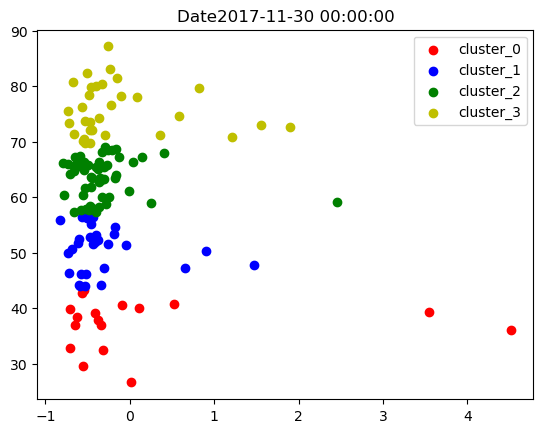

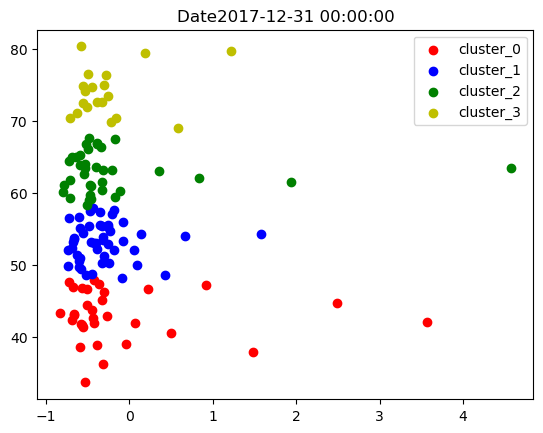

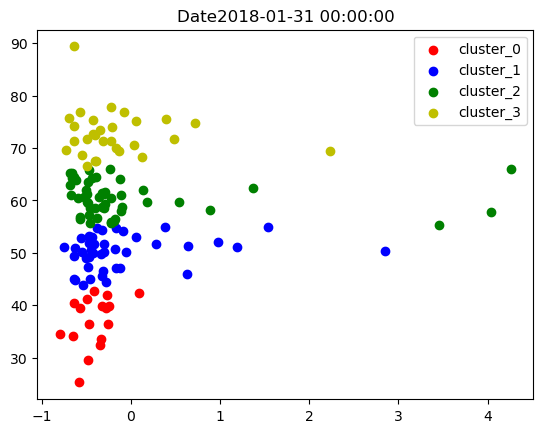

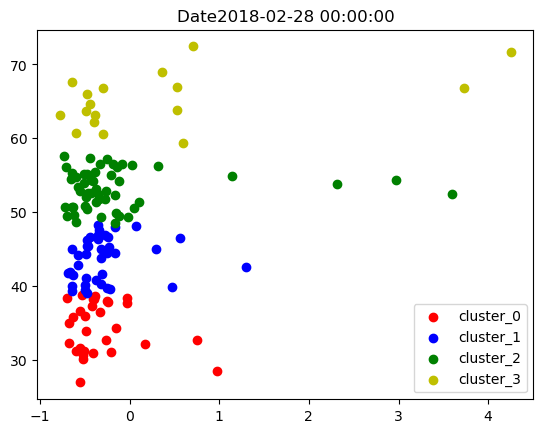

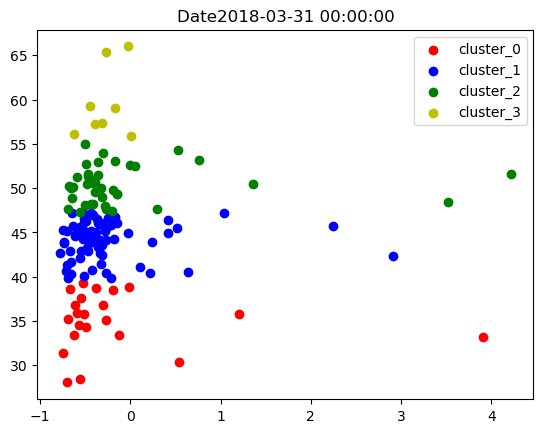

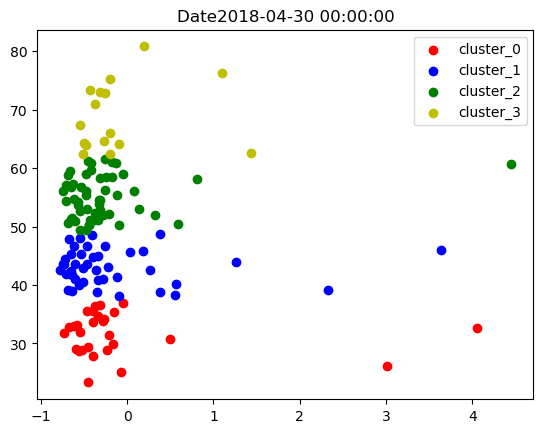

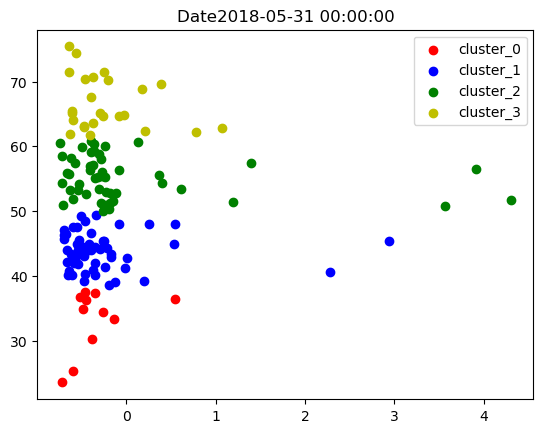

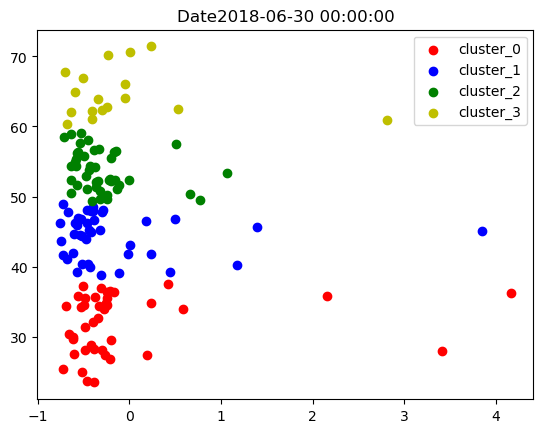

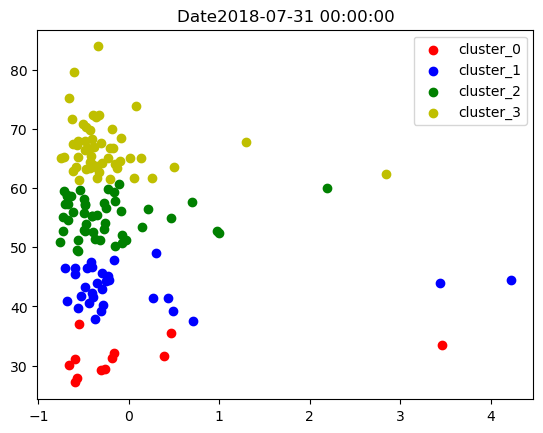

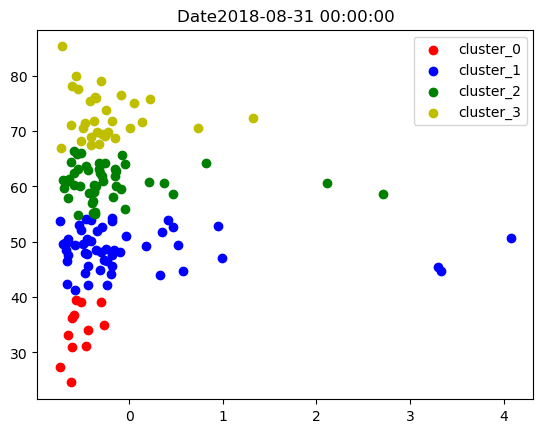

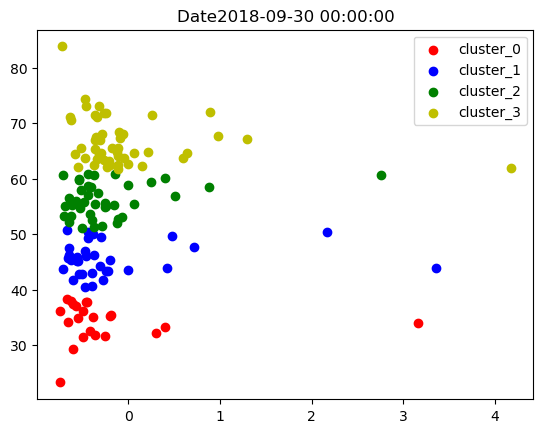

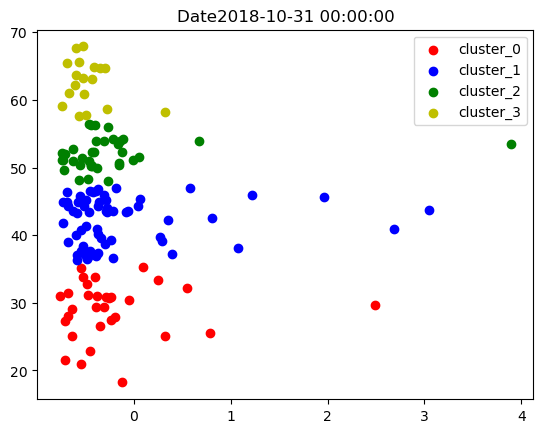

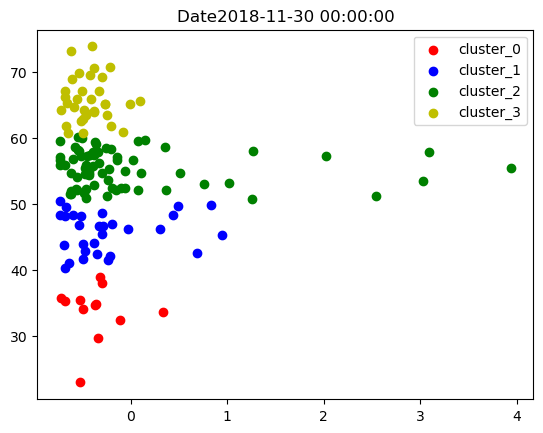

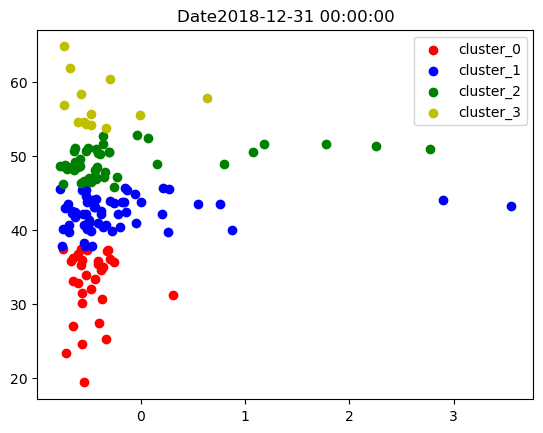

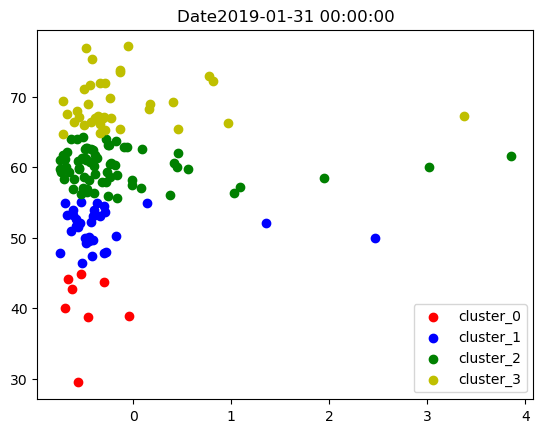

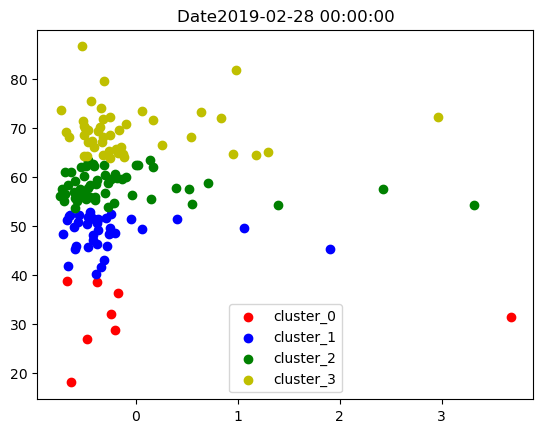

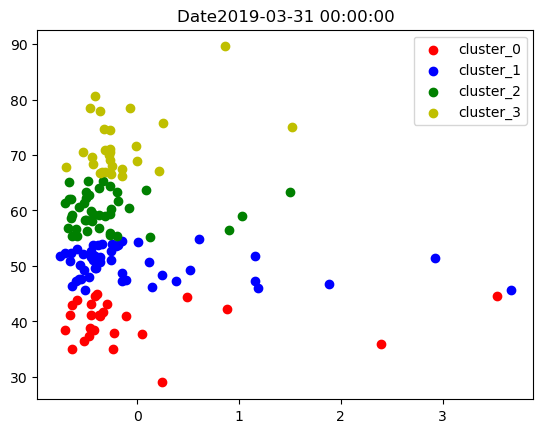

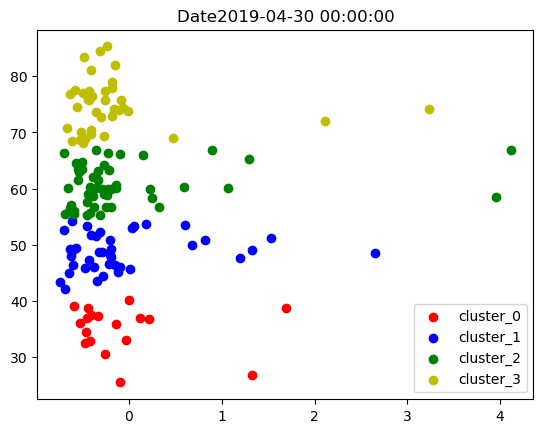

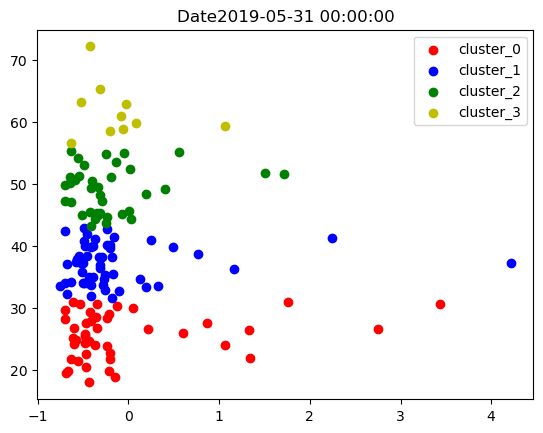

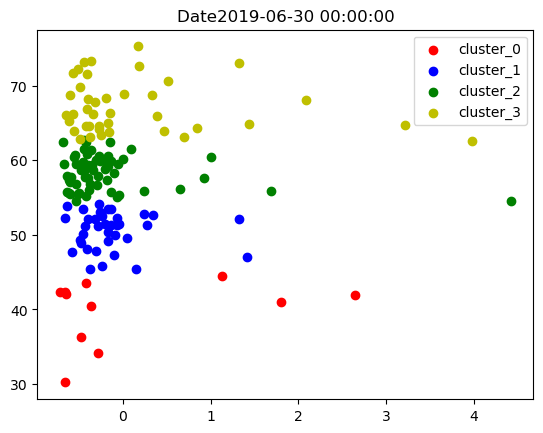

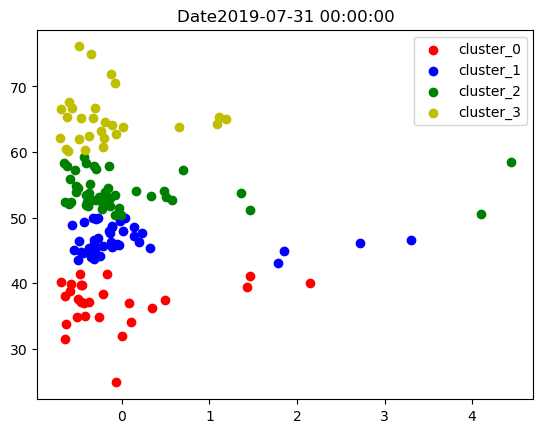

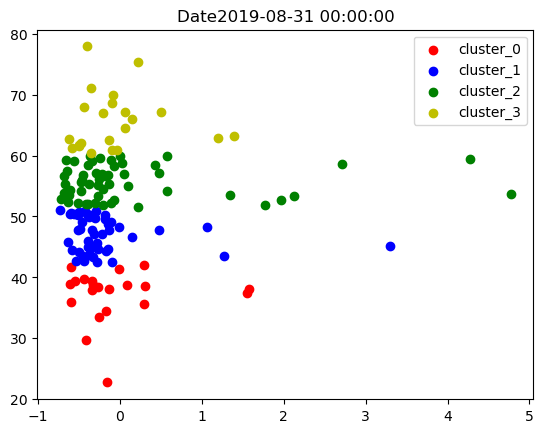

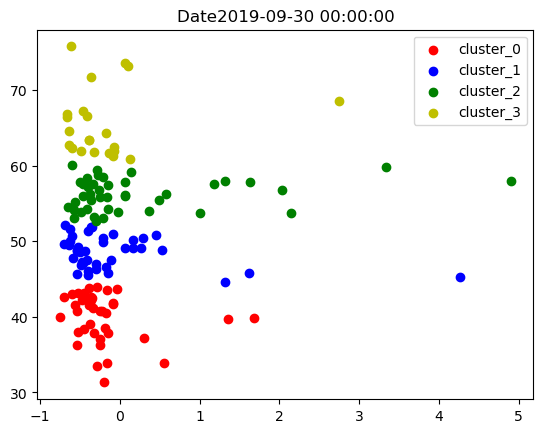

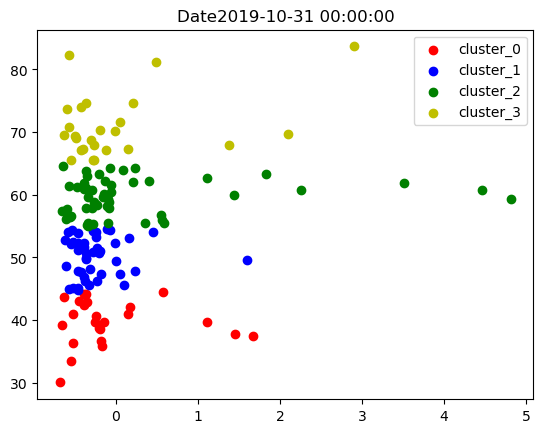

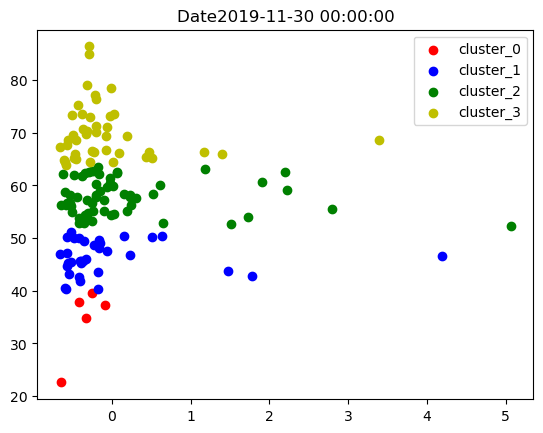

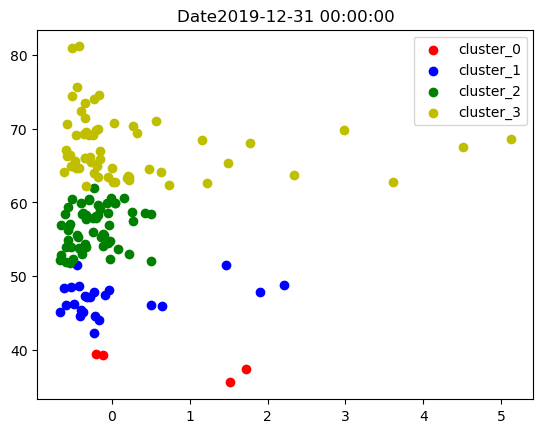

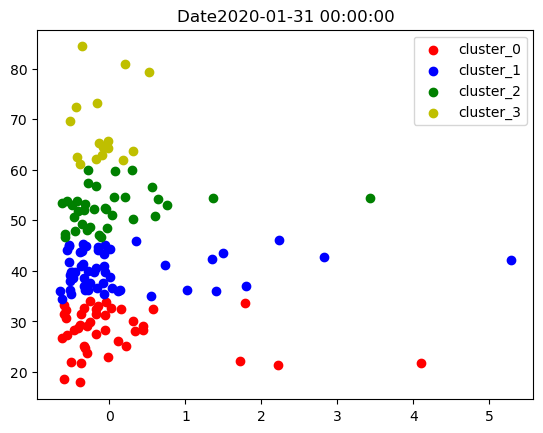

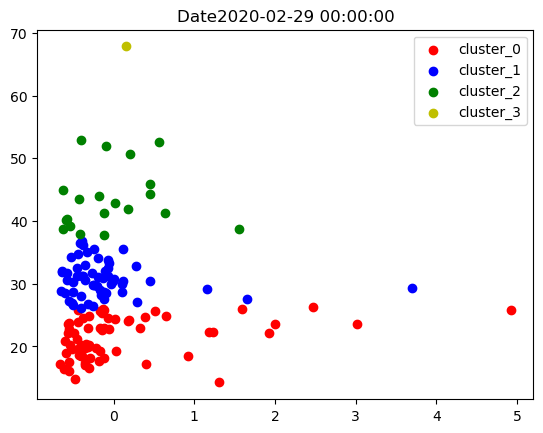

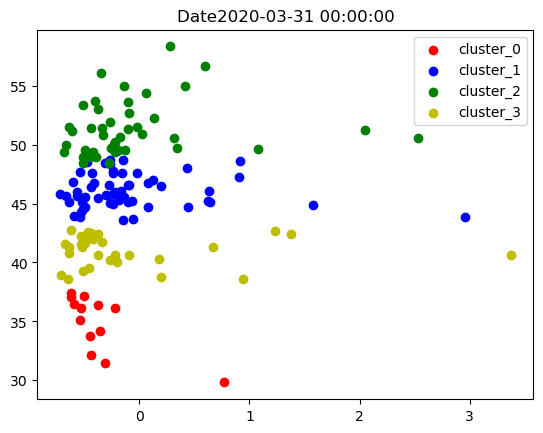

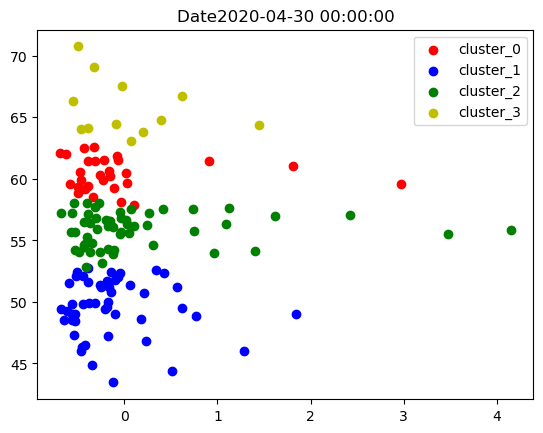

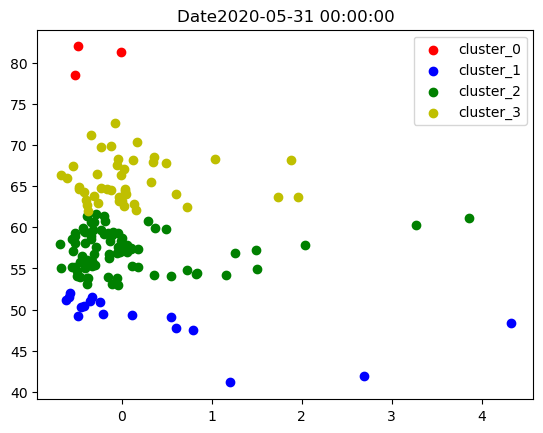

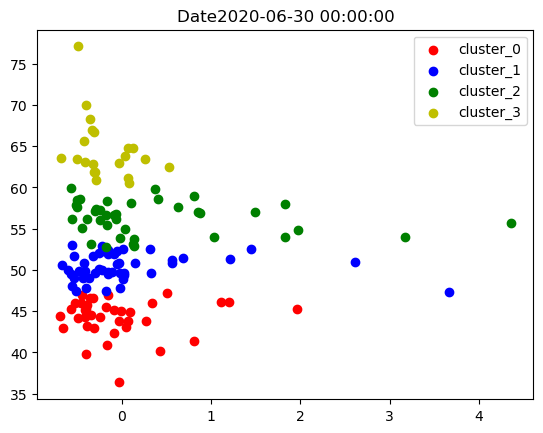

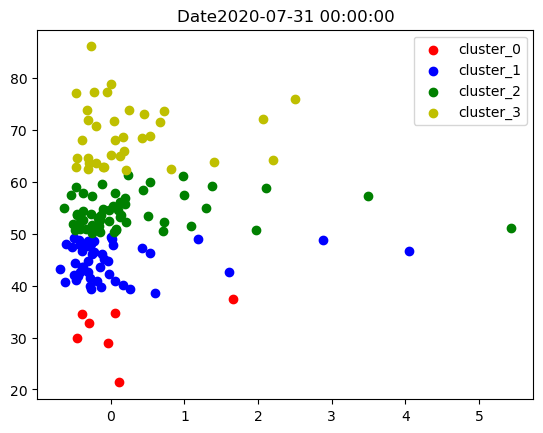

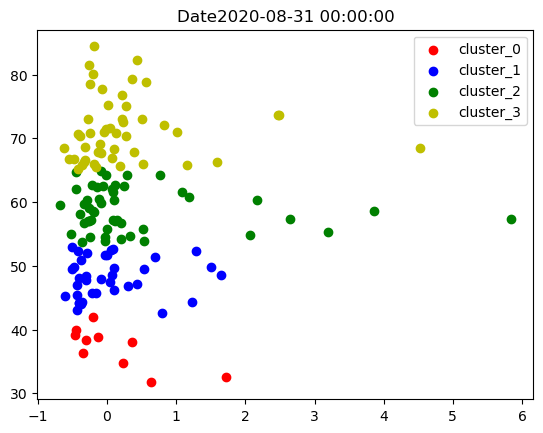

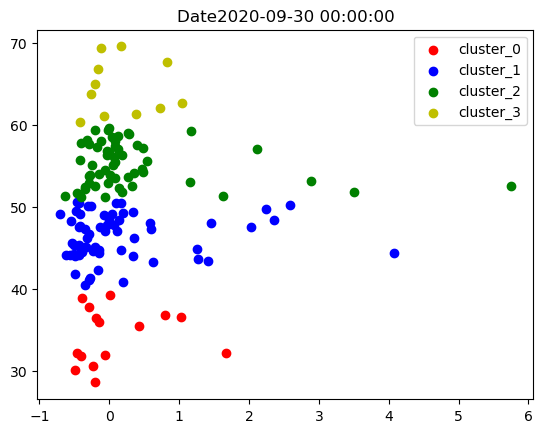

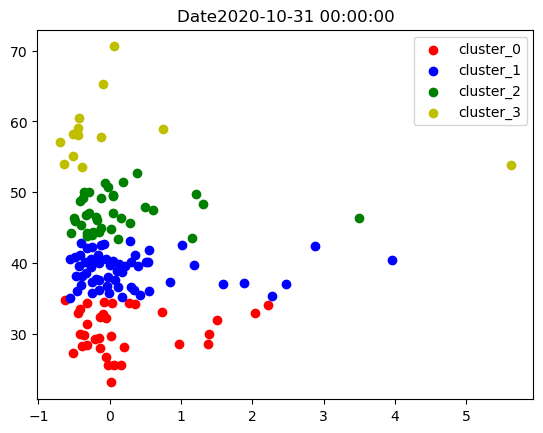

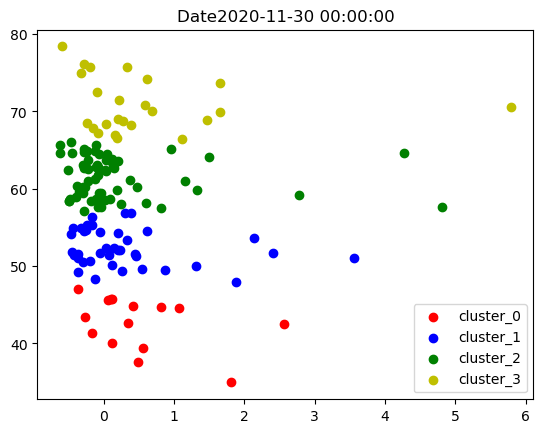

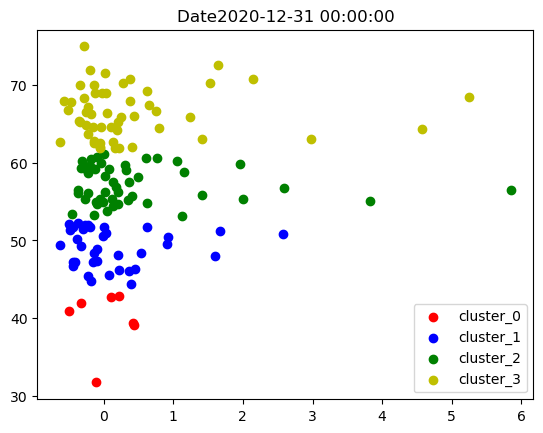

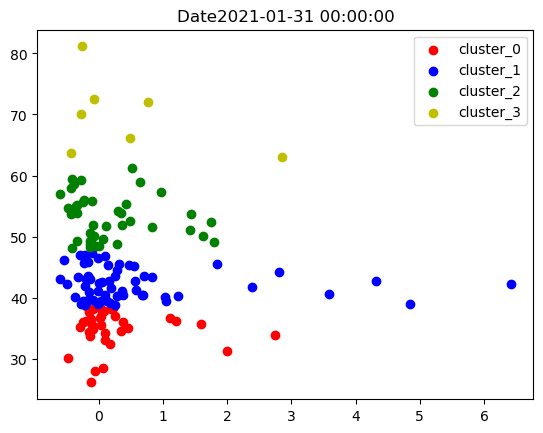

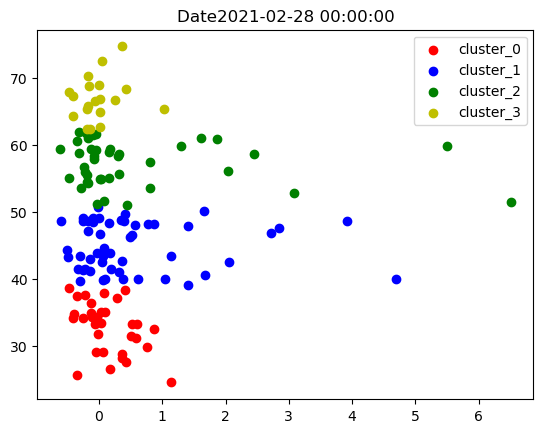

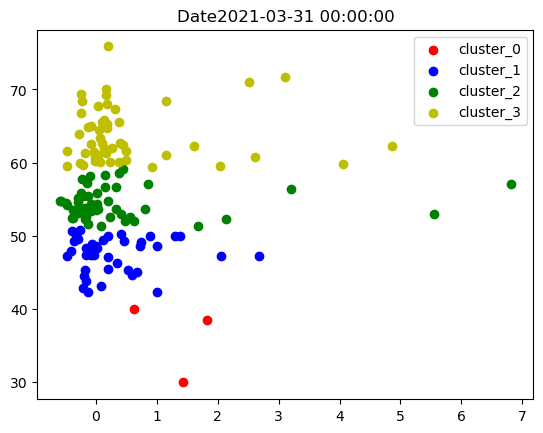

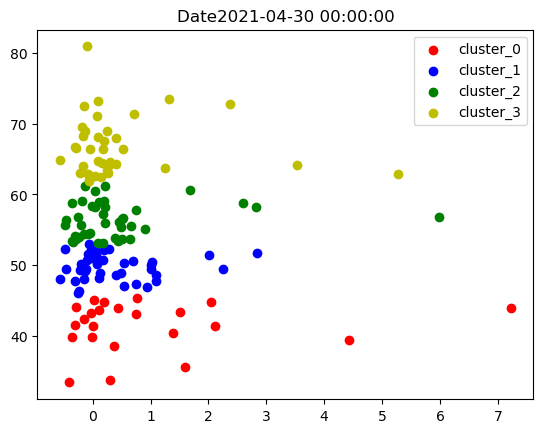

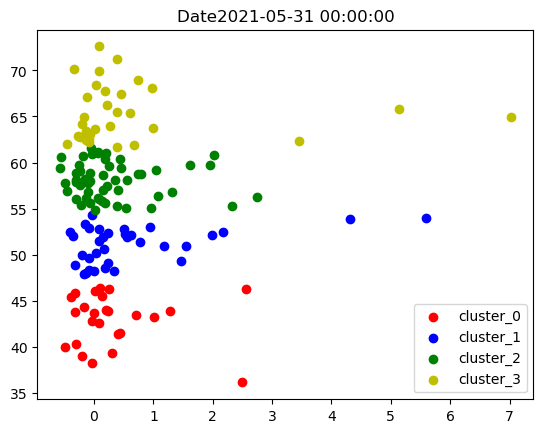

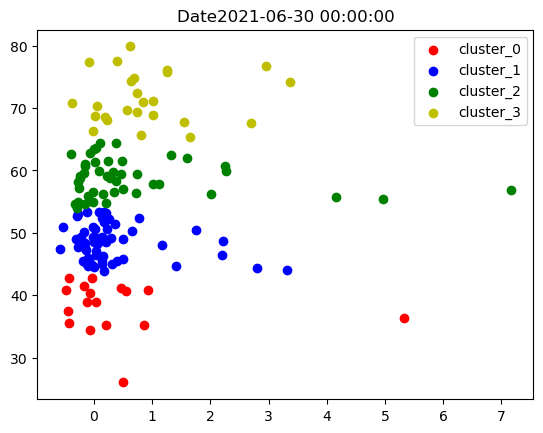

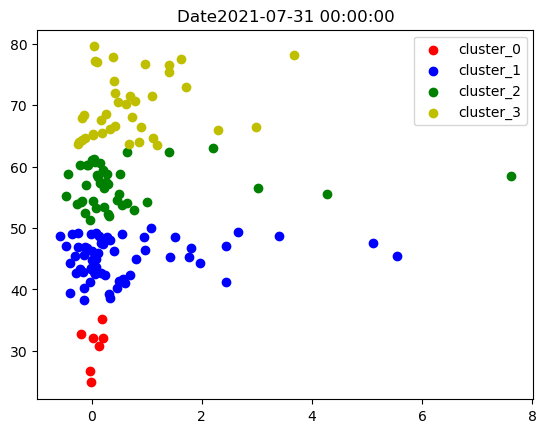

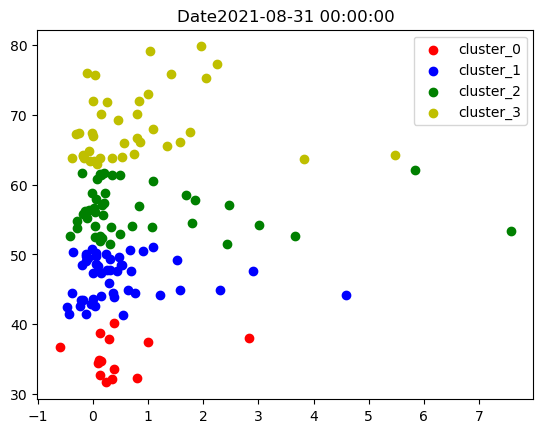

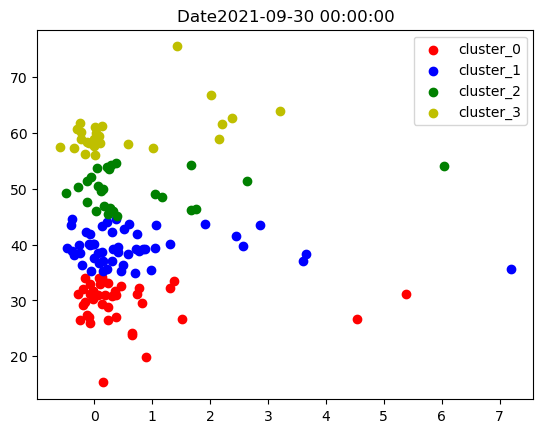

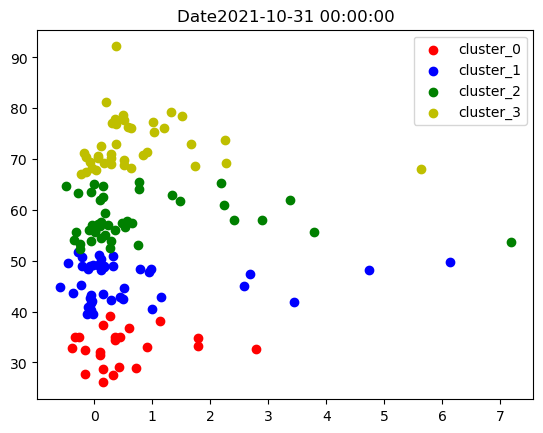

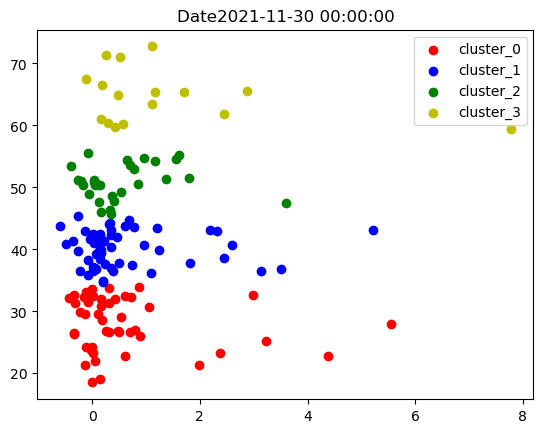

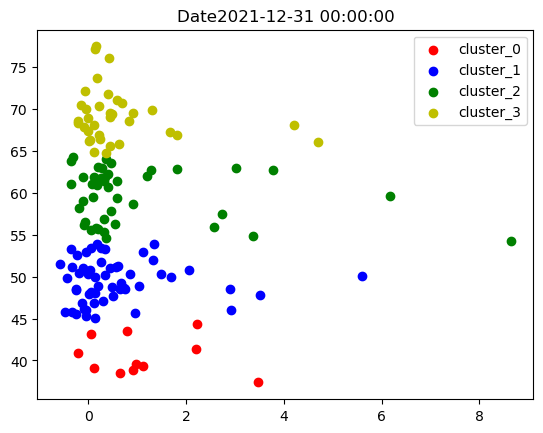

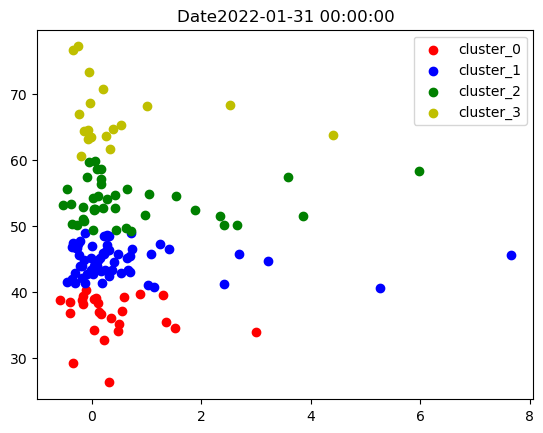

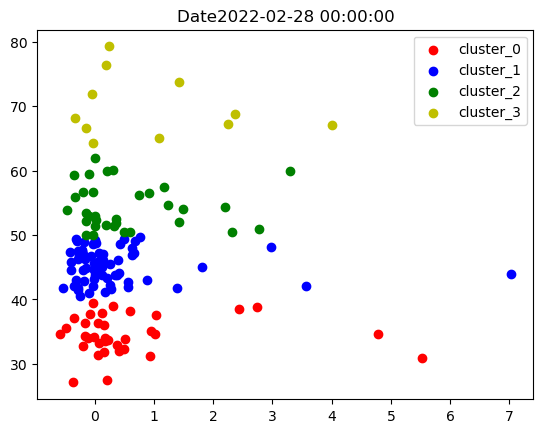

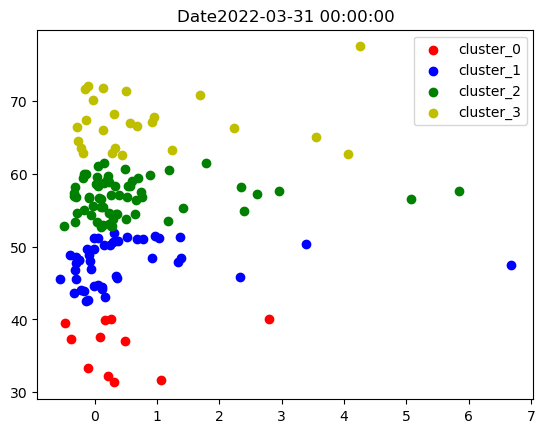

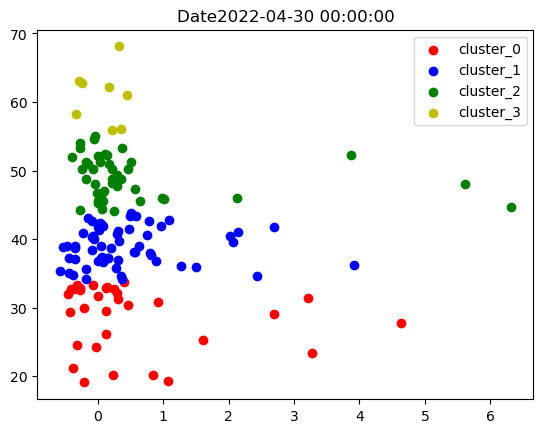

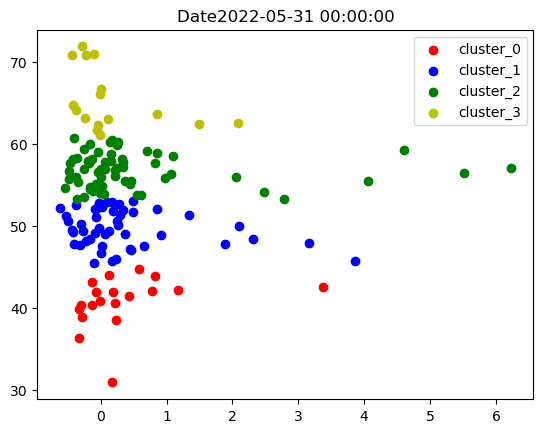

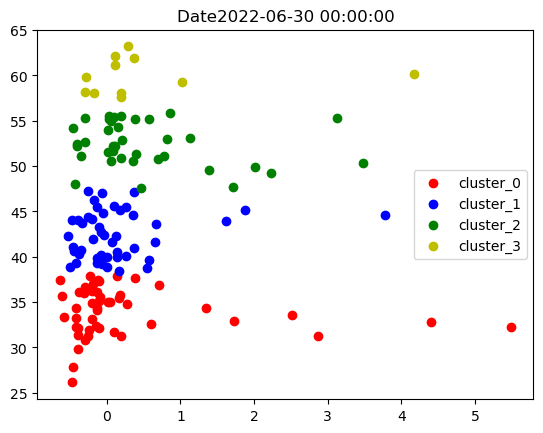

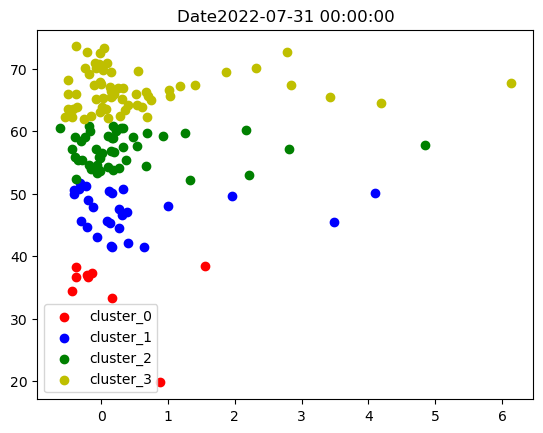

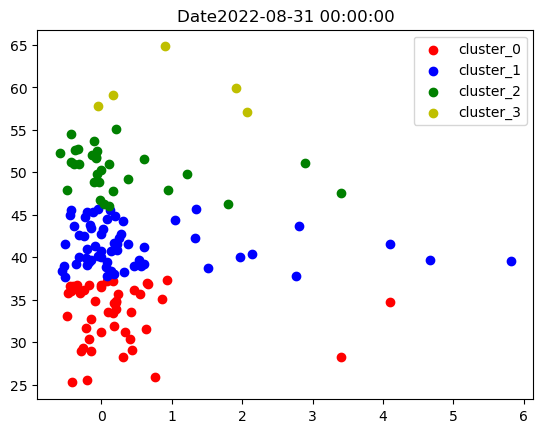

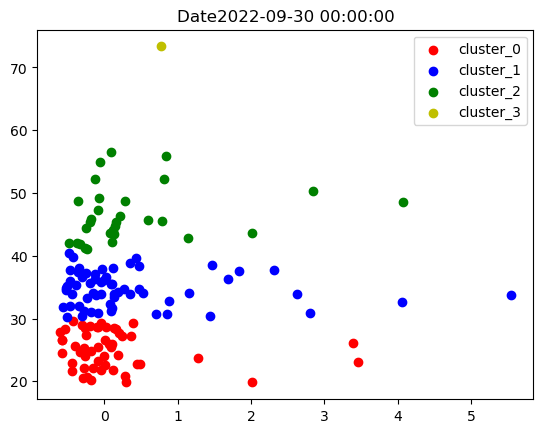

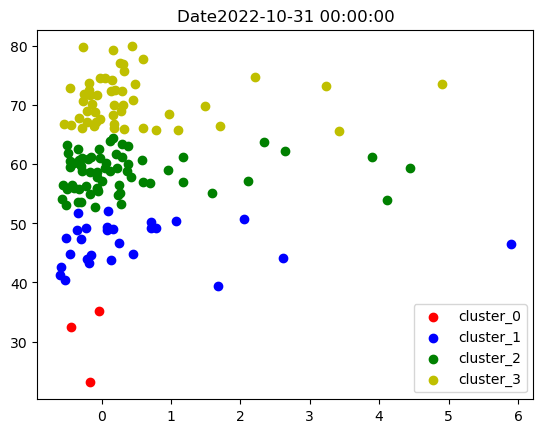

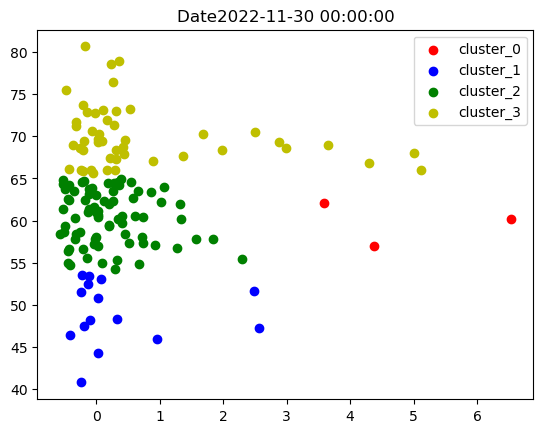

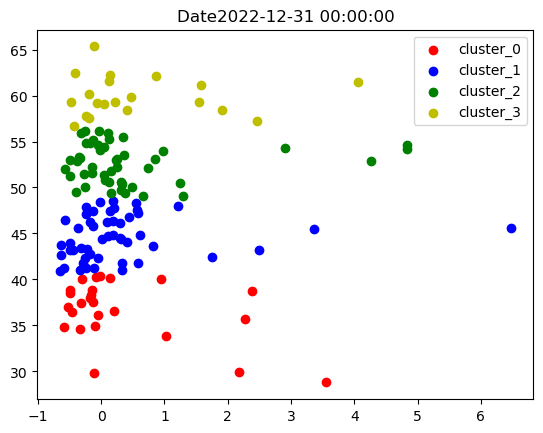

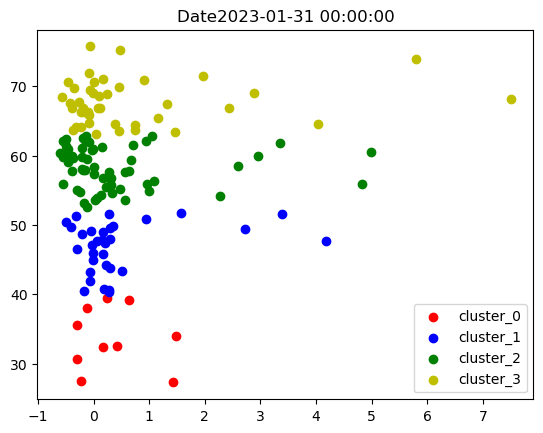

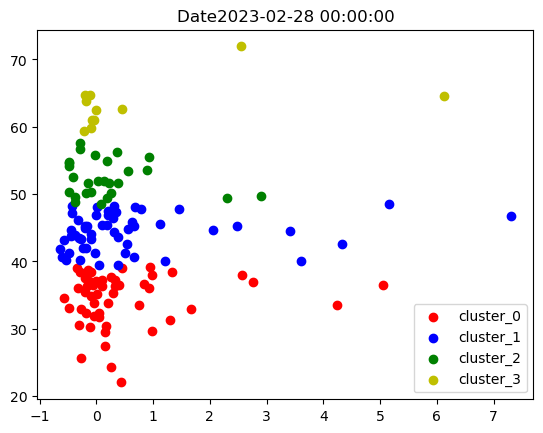

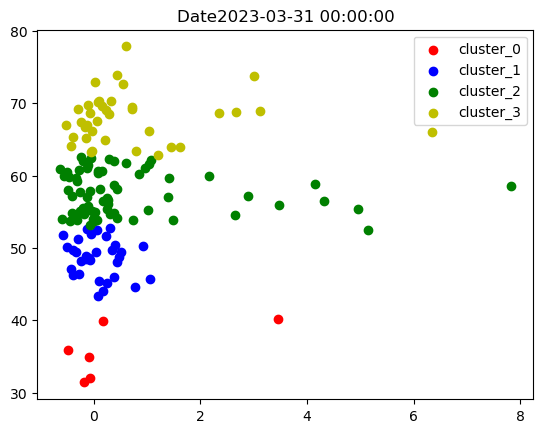

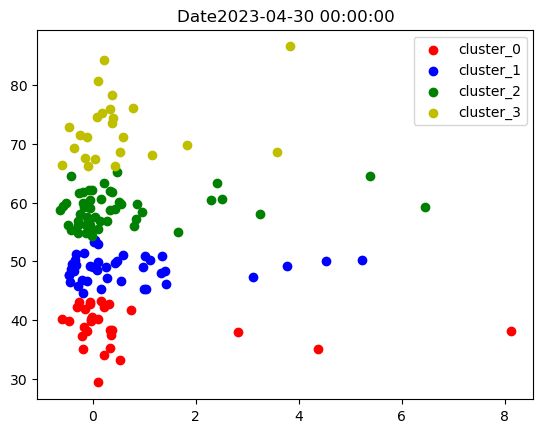

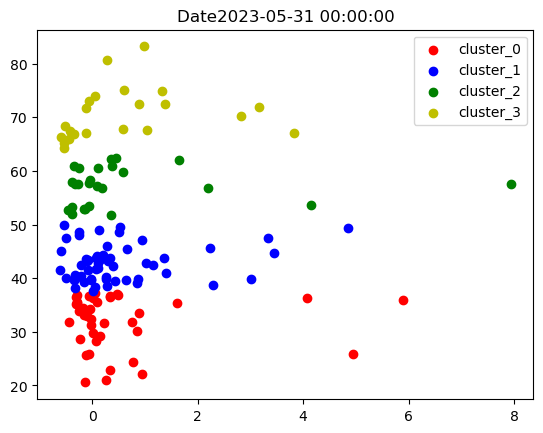

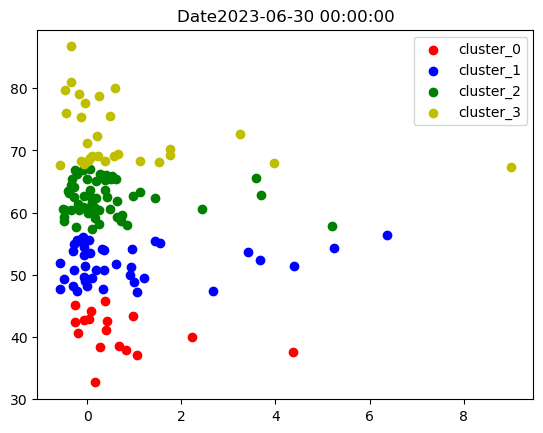

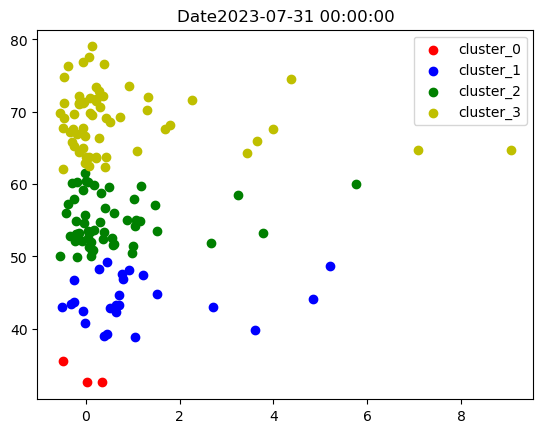

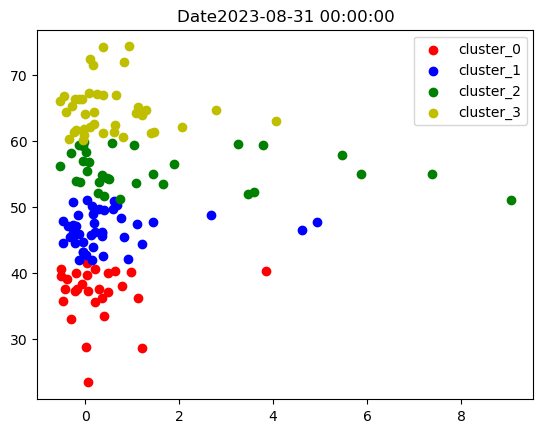

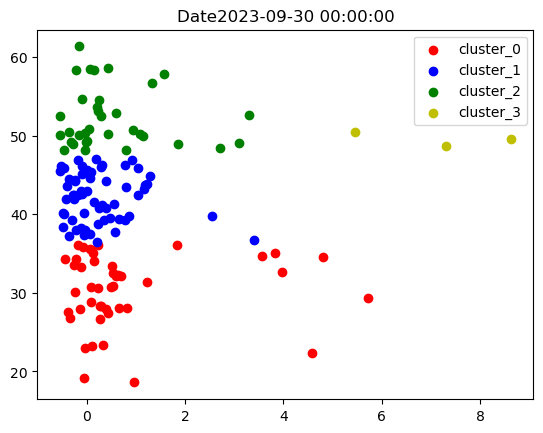

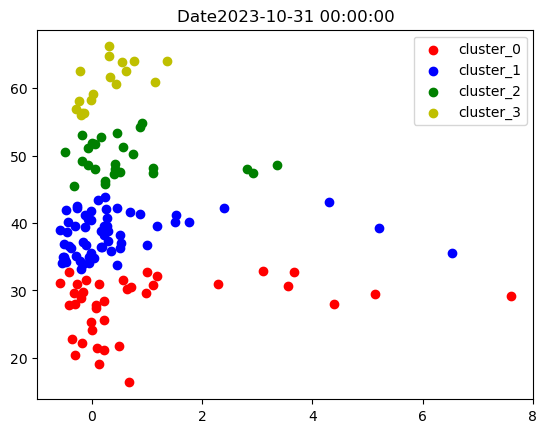

In [95]:
for i in data.index.get_level_values('date').unique().tolist():
    g=data.xs(i,level=0)
    plt.title(f'Date{i}')
    plot_clusters(g)

In [96]:
data

Bolband_width        LB        MB        UB       atr  \
date       ticker                                                          
2017-10-31 AAL          0.929247  3.269724  4.198970  5.128217 -0.790669   
           AAPL         0.845933  3.260957  4.106890  4.952823 -0.830914   
           ABBV         0.735405  3.435463  4.170868  4.906273 -0.752599   
           ABT          0.627862  3.473338  4.101200  4.729063 -0.798289   
           ACN          0.784462  3.354994  4.139455  4.923917 -0.631013   
...                          ...       ...       ...       ...       ...   
2023-10-31 VRTX         1.997287  2.922519  4.919806  6.917093  0.158959   
           VZ           2.309628  2.109517  4.419145  6.728773 -0.223088   
           WFC          2.199873  1.952594  4.152467  6.352341 -0.508816   
           WMT          1.930550  2.091724  4.022274  5.952824 -0.283990   
           XOM          1.451946  3.000753  4.452699  5.904645 -0.263012   

                   garman_klass_vol      macd       rsi2  returns_1mo  \
date       ticker                                                       
2017-10-31 AAL            -0.000363 -0.120040  35.676834    -0.014108   
           AAPL           -0.000945 -0.161063  74.606716     0.096808   
           ABBV           -0.029822 -0.183888  50.876372     0.022728   
           ABT            -0.004349 -0.210920  49.081147     0.021275   
           ACN            -0.003359 -0.215653  71.187343     0.064180   
...                             ...       ...        ...          ...   
2023-10-31 VRTX            0.000200  0.194231  52.723626     0.043998   
           VZ              0.000221 -0.159545  62.589187     0.061682   
           WFC             0.000093 -1.178474  36.903469    -0.044787   
           WMT             0.000050 -1.055894  56.919134     0.017695   
           XOM             0.000052 -0.362699  42.535964    -0.076459   

                   returns_2mo  returns_3mo  returns_6mo  returns_9mo  \
date       ticker                                                       
2017-10-31 AAL        0.046491    -0.069886     0.103144     0.064872   
           AAPL       0.030732     0.141020     0.186247     0.410326   
           ABBV       0.206901     0.299952     0.390605     0.515444   
           ABT        0.069793     0.108078     0.255656     0.319895   
           ACN        0.099257     0.115811     0.184986     0.275402   
...                        ...          ...          ...          ...   
2023-10-31 VRTX       0.042200     0.030368     0.065477     0.123615   
           VZ        -0.016320     0.009657    -0.097989    -0.143499   
           WFC       -0.054735    -0.147850    -0.002693    -0.148798   
           WMT        0.000922     0.021760     0.086037     0.144304   
           XOM       -0.023383     0.020889    -0.066840    -0.040773   

                   returns_12mo    Mkt-RF       SMB       HML       RMW  \
date       ticker                                                         
2017-10-31 AAL         0.163535  1.353623  1.158971  0.683672  0.639392   
           AAPL        0.515077  1.112926 -0.210950 -0.616299  0.677977   
           ABBV        0.677002  0.602300  0.155041  0.100975 -0.176700   
           ABT         0.414071  0.855874 -0.233321 -0.511076  0.151361   
           ACN         0.249398  1.164820 -0.154314 -0.299142  0.256991   
...                         ...       ...       ...       ...       ...   
2023-10-31 VRTX        0.163590  0.468050 -0.423025 -0.340930 -0.070414   
           VZ         -0.032259  0.346019 -0.147679  0.247264  0.301271   
           WFC        -0.126923  1.117865  0.294143  2.071039 -0.436996   
           WMT         0.161046  0.712578 -0.295618 -0.443584 -0.150594   
           XOM         0.012325  0.989170 -1.084269  1.777349 -0.625601   

                        CMA  cluster  
date       ticker                     
2017-10-31 AAL     0.347372        0  
           AAPL   -0.077315        3 

# Selecting stocks based on cluster to build portfolio

Hypothesis: Stocks having RSI around 70 will continue to carry that momentum in the next month,\.

In [97]:
#Cluster 3 has high RSI
data1=data[data['cluster']==3]

In [98]:
data1

Bolband_width        LB        MB        UB       atr  \
date       ticker                                                          
2017-10-31 AAPL         0.845933  3.260957  4.106890  4.952823 -0.830914   
           ACN          0.784462  3.354994  4.139455  4.923917 -0.631013   
           ADBE         0.945239  3.272909  4.218148  5.163386 -0.591805   
           AIG          1.404264  2.679735  4.083999  5.488263 -0.697956   
           AMAT         1.403385  2.772968  4.176353  5.579737 -0.657775   
...                          ...       ...       ...       ...       ...   
2023-10-31 RTX          1.935463  2.766114  4.701577  6.637039  0.318567   
           T            1.628742  2.892271  4.521014  6.149756 -0.143327   
           UNH          1.749715  3.088286  4.838001  6.587716  0.439426   
           VZ           2.309628  2.109517  4.419145  6.728773 -0.223088   
           WMT          1.930550  2.091724  4.022274  5.952824 -0.283990   

                   garman_klass_vol      macd       rsi2  returns_1mo  \
date       ticker                                                       
2017-10-31 AAPL           -0.000945 -0.161063  74.606716     0.096808   
           ACN            -0.003359 -0.215653  71.187343     0.064180   
           ADBE            0.000067 -0.092357  72.005982     0.174152   
           AIG            -0.011346 -0.081717  63.884746     0.052451   
           AMAT           -0.001633  0.254338  70.036340     0.083317   
...                             ...       ...        ...          ...   
2023-10-31 RTX             0.000059  0.251680  64.755499     0.089482   
           T               0.000418 -0.640274  56.250665     0.030638   
           UNH             0.000271  0.160001  60.605192     0.051608   
           VZ              0.000221 -0.159545  62.589187     0.061682   
           WMT             0.000050 -1.055894  56.919134     0.017695   

                   returns_2mo  returns_3mo  returns_6mo  returns_9mo  \
date       ticker                                                       
2017-10-31 AAPL       0.030732     0.141020     0.186247     0.410326   
           ACN        0.099257     0.115811     0.184986     0.275402   
           ADBE       0.128899     0.195713     0.309705     0.544893   
           AIG        0.073945    -0.007606     0.071707     0.021016   
           AMAT       0.250665     0.276475     0.395896     0.659822   
...                        ...          ...          ...          ...   
2023-10-31 RTX       -0.088680    -0.102045    -0.204780    -0.200004   
           T          0.046666     0.066129    -0.108308    -0.215530   
           UNH        0.116862     0.051157     0.086100     0.074466   
           VZ        -0.016320     0.009657    -0.097989    -0.143499   
           WMT        0.000922     0.021760     0.086037     0.144304   

                   returns_12mo    Mkt-RF       SMB       HML       RMW  \
date       ticker                                                         
2017-10-31 AAPL        0.515077  1.112926 -0.210950 -0.616299  0.677977   
           ACN         0.249398  1.164820 -0.154314 -0.299142  0.256991   
           ADBE        0.629244  1.064536 -0.338495 -0.111160 -0.345121   
           AIG         0.068704  1.127597 -0.181891  0.721287 -0.895080   
           AMAT        0.961171  1.272841  0.499197  0.872748 -0.396976   
...                         ...       ...       ...       ...       ...   
2023-10-31 RTX        -0.152626  0.506938  0.561299 -0.350105  0.077413   
           T          -0.110785  0.478324  0.171303  0.527304  0.563193   
           UNH        -0.030864  0.502719 -0.033073 -0.095768  0.180211   
           VZ         -0.032259  0.346019 -0.147679  0.247264  0.301271   
           WMT         0.161046  0.712578 -0.295618 -0.443584 -0.150594   

                        CMA  cluster  
date       ticker                     
2017-10-31 AAPL   -0.077315        3  
           ACN     0.082321        3 

In [99]:
data1=data1.reset_index(level=1)

In [100]:
data1

ticker  Bolband_width        LB        MB        UB       atr  \
date                                                                       
2017-10-31   AAPL       0.845933  3.260957  4.106890  4.952823 -0.830914   
2017-10-31    ACN       0.784462  3.354994  4.139455  4.923917 -0.631013   
2017-10-31   ADBE       0.945239  3.272909  4.218148  5.163386 -0.591805   
2017-10-31    AIG       1.404264  2.679735  4.083999  5.488263 -0.697956   
2017-10-31   AMAT       1.403385  2.772968  4.176353  5.579737 -0.657775   
...           ...            ...       ...       ...       ...       ...   
2023-10-31    RTX       1.935463  2.766114  4.701577  6.637039  0.318567   
2023-10-31      T       1.628742  2.892271  4.521014  6.149756 -0.143327   
2023-10-31    UNH       1.749715  3.088286  4.838001  6.587716  0.439426   
2023-10-31     VZ       2.309628  2.109517  4.419145  6.728773 -0.223088   
2023-10-31    WMT       1.930550  2.091724  4.022274  5.952824 -0.283990   

            garman_klass_vol      macd       rsi2  returns_1mo  ...  \
date                                                            ...   
2017-10-31         -0.000945 -0.161063  74.606716     0.096808  ...   
2017-10-31         -0.003359 -0.215653  71.187343     0.064180  ...   
2017-10-31          0.000067 -0.092357  72.005982     0.174152  ...   
2017-10-31         -0.011346 -0.081717  63.884746     0.052451  ...   
2017-10-31         -0.001633  0.254338  70.036340     0.083317  ...   
...                      ...       ...        ...          ...  ...   
2023-10-31          0.000059  0.251680  64.755499     0.089482  ...   
2023-10-31          0.000418 -0.640274  56.250665     0.030638  ...   
2023-10-31          0.000271  0.160001  60.605192     0.051608  ...   
2023-10-31          0.000221 -0.159545  62.589187     0.061682  ...   
2023-10-31          0.000050 -1.055894  56.919134     0.017695  ...   

            returns_3mo  returns_6mo  returns_9mo  returns_12mo    Mkt-RF  \
date                                                                        
2017-10-31     0.141020     0.186247     0.410326      0.515077  1.112926   
2017-10-31     0.115811     0.184986     0.275402      0.249398  1.164820   
2017-10-31     0.195713     0.309705     0.544893      0.629244  1.064536   
2017-10-31    -0.007606     0.071707     0.021016      0.068704  1.127597   
2017-10-31     0.276475     0.395896     0.659822      0.961171  1.272841   
...                 ...          ...          ...           ...       ...   
2023-10-31    -0.102045    -0.204780    -0.200004     -0.152626  0.506938   
2023-10-31     0.066129    -0.108308    -0.215530     -0.110785  0.478324   
2023-10-31     0.051157     0.086100     0.074466     -0.030864  0.502719   
2023-10-31     0.009657    -0.097989    -0.143499     -0.032259  0.346019   
2023-10-31     0.021760     0.086037     0.144304      0.161046  0.712578   

                 SMB       HML       RMW       CMA  cluster  
date                                                         
2017-10-31 -0.210950 -0.616299  0.677977 -0.077315        3  
2017-10-31 -0.154314 -0.299142  0.256991  0.082321        3  
2017-10-31 -0.338495 -0.111160 -0.345121 -1.021392        3  
2017-10-31 -0.181891  0.721287 -0.895080 -0.447164        3  
2017-10-31  0.499197  0.872748 -0.396976 -0.952142        3  
...              ...       ...       ...       ...      ...  
2023-10-31  0.561299 -0.350105  0.077413  1.270562        3  
2023-10-31  0.171303  0.527304  0.563193  0.441405        3  
2023-10-31 -0.033073 -0.095768  0.180211  0.294900        3  
2023-10-31 -0.147679  0.247264  0.301271  0.144726        3  
2023-10-31 -0.295618 -0.443584 -0.150594  0.552212        3  

[2036 rows x 21 columns]

In [101]:
data1.index=data1.index+pd.DateOffset(1)# Shifting all dates 1 day ahead, i.e beginning of next month

In [102]:
data1=data1.reset_index().set_index(['date','ticker'])

In [103]:
data1

Bolband_width        LB        MB        UB       atr  \
date       ticker                                                          
2017-11-01 AAPL         0.845933  3.260957  4.106890  4.952823 -0.830914   
           ACN          0.784462  3.354994  4.139455  4.923917 -0.631013   
           ADBE         0.945239  3.272909  4.218148  5.163386 -0.591805   
           AIG          1.404264  2.679735  4.083999  5.488263 -0.697956   
           AMAT         1.403385  2.772968  4.176353  5.579737 -0.657775   
...                          ...       ...       ...       ...       ...   
2023-11-01 RTX          1.935463  2.766114  4.701577  6.637039  0.318567   
           T            1.628742  2.892271  4.521014  6.149756 -0.143327   
           UNH          1.749715  3.088286  4.838001  6.587716  0.439426   
           VZ           2.309628  2.109517  4.419145  6.728773 -0.223088   
           WMT          1.930550  2.091724  4.022274  5.952824 -0.283990   

                   garman_klass_vol      macd       rsi2  returns_1mo  \
date       ticker                                                       
2017-11-01 AAPL           -0.000945 -0.161063  74.606716     0.096808   
           ACN            -0.003359 -0.215653  71.187343     0.064180   
           ADBE            0.000067 -0.092357  72.005982     0.174152   
           AIG            -0.011346 -0.081717  63.884746     0.052451   
           AMAT           -0.001633  0.254338  70.036340     0.083317   
...                             ...       ...        ...          ...   
2023-11-01 RTX             0.000059  0.251680  64.755499     0.089482   
           T               0.000418 -0.640274  56.250665     0.030638   
           UNH             0.000271  0.160001  60.605192     0.051608   
           VZ              0.000221 -0.159545  62.589187     0.061682   
           WMT             0.000050 -1.055894  56.919134     0.017695   

                   returns_2mo  returns_3mo  returns_6mo  returns_9mo  \
date       ticker                                                       
2017-11-01 AAPL       0.030732     0.141020     0.186247     0.410326   
           ACN        0.099257     0.115811     0.184986     0.275402   
           ADBE       0.128899     0.195713     0.309705     0.544893   
           AIG        0.073945    -0.007606     0.071707     0.021016   
           AMAT       0.250665     0.276475     0.395896     0.659822   
...                        ...          ...          ...          ...   
2023-11-01 RTX       -0.088680    -0.102045    -0.204780    -0.200004   
           T          0.046666     0.066129    -0.108308    -0.215530   
           UNH        0.116862     0.051157     0.086100     0.074466   
           VZ        -0.016320     0.009657    -0.097989    -0.143499   
           WMT        0.000922     0.021760     0.086037     0.144304   

                   returns_12mo    Mkt-RF       SMB       HML       RMW  \
date       ticker                                                         
2017-11-01 AAPL        0.515077  1.112926 -0.210950 -0.616299  0.677977   
           ACN         0.249398  1.164820 -0.154314 -0.299142  0.256991   
           ADBE        0.629244  1.064536 -0.338495 -0.111160 -0.345121   
           AIG         0.068704  1.127597 -0.181891  0.721287 -0.895080   
           AMAT        0.961171  1.272841  0.499197  0.872748 -0.396976   
...                         ...       ...       ...       ...       ...   
2023-11-01 RTX        -0.152626  0.506938  0.561299 -0.350105  0.077413   
           T          -0.110785  0.478324  0.171303  0.527304  0.563193   
           UNH        -0.030864  0.502719 -0.033073 -0.095768  0.180211   
           VZ         -0.032259  0.346019 -0.147679  0.247264  0.301271   
           WMT         0.161046  0.712578 -0.295618 -0.443584 -0.150594   

                        CMA  cluster  
date       ticker                     
2017-11-01 AAPL   -0.077315        3  
           ACN     0.082321        3 

In [104]:
dates=data1.index.get_level_values('date').unique().tolist()

In [105]:
fixed_dates={}
for i in dates:
    fixed_dates[i.strftime('%Y-%m-%d')]=data1.xs(i,level=0).index.tolist()

In [106]:
fixed_dates.keys()#Finding dates to invest and which stocks to invest

dict_keys(['2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01', '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01', '2023-09-

In [107]:
#Dropping future dates
if fixed_dates:
    last_key = list(fixed_dates.keys())[-1]
    del fixed_dates[last_key]




In [108]:
fixed_dates.keys()

dict_keys(['2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01', '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01', '2023-09-

# Portfolio optimization

In [109]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

def optimize_weights(prices, lower_bound=0):
    
    returns = expected_returns.mean_historical_return(prices=prices,
                                                      frequency=252)
    
    cov = risk_models.sample_cov(prices=prices,
                                 frequency=252)
    
    ef = EfficientFrontier(expected_returns=returns,
                           cov_matrix=cov,
                           weight_bounds=(lower_bound, .1),
                           solver='SCS')
    
    weights = ef.max_sharpe()
    
    return ef.clean_weights()

In [110]:
stocks = data.index.get_level_values('ticker').unique().tolist()

new_df = yf.download(tickers=stocks,
                     start=data.index.get_level_values('date').unique()[0]-pd.DateOffset(months=12),
                     end=data.index.get_level_values('date').unique()[-1])

new_df

[*********************100%%**********************]  164 of 164 completed


Adj Close                                                 \
                  AAL        AAPL        ABBV        ABT         ACN   
Date                                                                   
2016-10-31  39.134335   26.281519   41.009071  34.630024  104.350304   
2016-11-01  38.363213   25.807007   41.501659  34.462341  104.260544   
2016-11-02  38.276463   25.830147   41.751625  34.153469  106.477890   
2016-11-03  38.054207   25.553278   41.089947  33.871052  104.987694   
2016-11-04  38.402092   25.322941   41.200226  34.497643  105.239059   
...               ...         ...         ...        ...         ...   
2023-10-24  11.210000  173.211807  146.309998  94.809998  296.089996   
2023-10-25  11.040000  170.874893  145.259995  93.570000  292.679993   
2023-10-26  11.150000  166.670425  145.199997  93.980003  292.040009   
2023-10-27  10.920000  167.998672  138.929993  92.849998  290.040009   
2023-10-30  11.180000  170.065933  141.889999  93.000000  292.700012   

                                                                       ...  \
                  ADBE         ADI         ADP        ADSK        AIG  ...   
Date                                                                   ...   
2016-10-31  107.510002   55.587616   74.686066   72.279999  50.977711  ...   
2016-11-01  106.870003   55.154026   74.565964   70.099998  50.134960  ...   
2016-11-02  105.889999   55.206047   77.191048   68.680000  50.027557  ...   
2016-11-03  107.169998   55.370819   76.633415   67.610001  48.044628  ...   
2016-11-04  106.199997   55.006592   76.418961   69.440002  47.408443  ...   
...                ...         ...         ...         ...        ...  ...   
2023-10-24  539.559998  164.156525  239.001190  205.039993  59.548069  ...   
2023-10-25  521.140015  159.040634  217.014481  200.210007  60.632206  ...   
2023-10-26  514.280029  160.105621  217.521408  196.119995  60.522797  ...   
2023-10-27  508.119995  159.816986  213.545502  195.149994  59.209896  ...   
2023-10-30  526.940002  155.148972  214.778046  197.789993  60.671993  ...   

             Volume                                                   \
                VLO     VRTX      VTRS        VZ       WBA       WDC   
Date                                                                   
2016-10-31  4969500  1928200   5473100  12459400   4662100   3363200   
2016-11-01  7816800  2458200   6488900  13229400   5130800   3821100   
2016-11-02  7317600  2580400   5947000  16488200   9783100   4216200   
2016-11-03  3855900  2371000  17832200  12605100   4586500   3192600   
2016-11-04  3729900  1902100   7932400  14410200   7023900   2705600   
...             ...      ...       ...       ...       ...       ...   
2023-10-24  2913400   997300   8489700  61617900  10157700   4314300   
2023-10-25  3056200   958000   6589300  30832800  10408400   2764400   
2023-10-26  3992500   942100   7572300  34367000   8832500  17872200   
2023-10-27  3674500   910700   6167700  23924800   9208600   6533300   
2023-10-30  2925400   872400   7585800  31497700   9239900  16960100   

                                                  
                 WFC      WMT     WYNN       XOM  
Date                                              
2016-10-31  20115900  6389000  1341600  16663800  
2016-11-01  20020200  8838600  3722300  13050600  
2016-11-02  19566600  7645300  2542400  11226100  
2016-11-03  14982700  6803900  9050400   8836500  
2016-11-04  27391600  7262100  3223800  13877100  
...              ...      ...      ...       ...  
2023-10-24  15097800  5845000  1335000  16786100  
2023-10-25  13849000  5540600  1518500  22047300  
2023-10-26  15480300  5406700  2183400  18768300  
2023-10-27  13582800  4609900  1587500  23092000  
2023-10-30  14141900  4217900  1343100  19379900  

[1761 rows x 984 columns]

In [111]:
returns_dataframe = np.log(new_df['Adj Close']).diff()

portfolio_df = pd.DataFrame()

for start_date in fixed_dates.keys():
    
    try:

        end_date = (pd.to_datetime(start_date)+pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d')

        cols = fixed_dates[start_date]

        optimization_start_date = (pd.to_datetime(start_date)-pd.DateOffset(months=12)).strftime('%Y-%m-%d')

        optimization_end_date = (pd.to_datetime(start_date)-pd.DateOffset(days=1)).strftime('%Y-%m-%d')
        
        optimization_df = new_df[optimization_start_date:optimization_end_date]['Adj Close'][cols]
        
        success = False
        try:
            weights = optimize_weights(prices=optimization_df,
                                   lower_bound=round(1/(len(optimization_df.columns)*2),3))

            weights = pd.DataFrame(weights, index=pd.Series(0))
            
            success = True
        except:
            print(f'Max Sharpe Optimization failed for {start_date}, Continuing with Equal-Weights')
        
        if success==False:
            weights = pd.DataFrame([1/len(optimization_df.columns) for i in range(len(optimization_df.columns))],
                                     index=optimization_df.columns.tolist(),
                                     columns=pd.Series(0)).T
        
        temp_df = returns_dataframe[start_date:end_date]

        temp_df = temp_df.stack().to_frame('return').reset_index(level=0)\
                   .merge(weights.stack().to_frame('weight').reset_index(level=0, drop=True),
                          left_index=True,
                          right_index=True)\
                   .reset_index().set_index(['Date', 'index']).unstack().stack()

        temp_df.index.names = ['date', 'ticker']

        temp_df['weighted_return'] = temp_df['return']*temp_df['weight']

        temp_df = temp_df.groupby(level=0)['weighted_return'].sum().to_frame('Strategy Return')

        portfolio_df = pd.concat([portfolio_df, temp_df], axis=0)
    
    except Exception as e:
        print(e)

portfolio_df = portfolio_df.drop_duplicates()

portfolio_df

Max Sharpe Optimization failed for 2018-04-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2020-03-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2020-04-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2021-02-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2022-05-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2022-09-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2022-10-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2023-02-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2023-10-01, Continuing with Equal-Weights


Strategy Return
date                       
2017-11-01         0.001670
2017-11-02         0.002568
2017-11-03         0.005724
2017-11-06         0.003432
2017-11-07         0.002753
...                     ...
2023-10-24         0.001923
2023-10-25        -0.014183
2023-10-26         0.000354
2023-10-27        -0.000999
2023-10-30        -0.008824

[1508 rows x 1 columns]

In [112]:
spy = yf.download(tickers='SPY',
                  start='2015-01-01',
                  end=dt.date.today())

spy_ret = np.log(spy[['Adj Close']]).diff().dropna().rename({'Adj Close':'SPY Buy&Hold'}, axis=1)

portfolio_df = portfolio_df.merge(spy_ret,
                                  left_index=True,
                                  right_index=True)

portfolio_df

[*********************100%%**********************]  1 of 1 completed


Strategy Return  SPY Buy&Hold
2017-11-01         0.001670      0.001321
2017-11-02         0.002568      0.000388
2017-11-03         0.005724      0.003333
2017-11-06         0.003432      0.001546
2017-11-07         0.002753     -0.000695
...                     ...           ...
2023-10-24         0.001923      0.007511
2023-10-25        -0.014183     -0.014456
2023-10-26         0.000354     -0.012047
2023-10-27        -0.000999     -0.004543
2023-10-30        -0.008824      0.011885

[1508 rows x 2 columns]

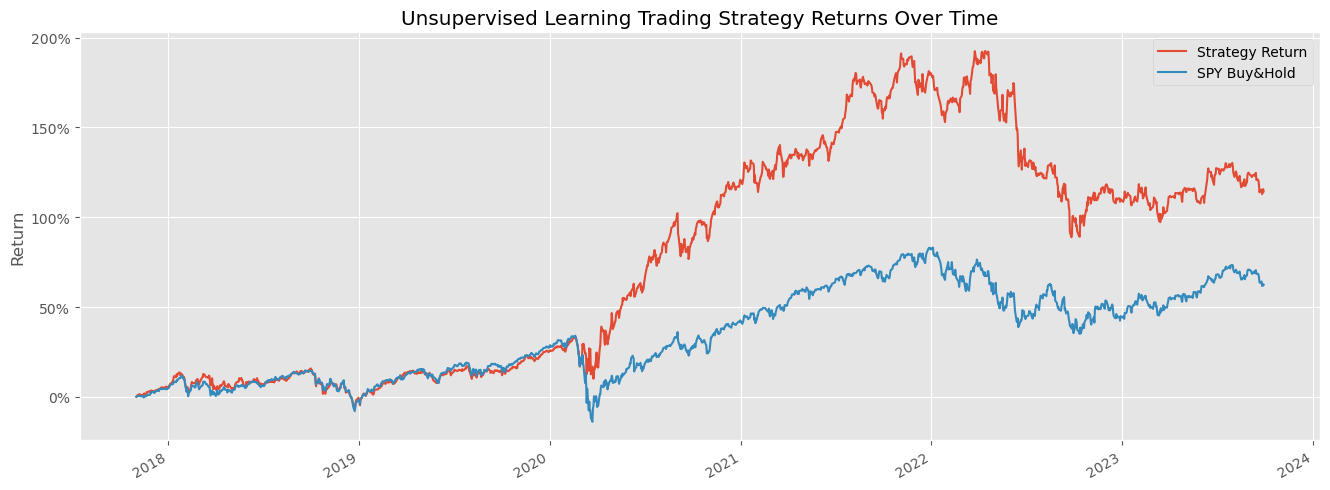

In [113]:
import matplotlib.ticker as mtick

plt.style.use('ggplot')

portfolio_cumulative_return = np.exp(np.log1p(portfolio_df).cumsum())-1

portfolio_cumulative_return[:'2023-09-29'].plot(figsize=(16,6))

plt.title('Unsupervised Learning Trading Strategy Returns Over Time')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.ylabel('Return')

plt.show()
